# Business Case

We have been tasked with engineering a model for a 'client' that will predict whether or not a customer will respond to an offer for a product or a service.

The 'client' has provided us with a dataset containg features and labels from 2240 customers. 

We can either assume:
1. This is a sample from the wider customer population and..
2. This sample accurately reflects the distribution of the customer base.

Or we can assume this dataset indeed covers the entire customer base of the 'client' and is not a sample. In this case, the 'client' would be a much smaller business.

Our chosen algorithm/model for this case will be the Logistic Classifier.

The problem with this dataset, however, is that the label ('Response') is imbalanced. There are more customers who have rejected the company's recent sales offer than those who have accepted it. As such, we can expect very low recall and f-1 scores, and ultimately an inefficient prediction model.

To fix this problem, we will be adopting two approaches in adjusting our classifier model:
1. SMOTE - Synthetic Minority Oversampling Technique.
2. Ensemble Undersampling.

The approach with a better recall and f-1 score will be presented to the 'client'.

# Dataset and Library Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

The dataset will be stored in two different variables. One variable will hold the raw dataset, as is. The other variable will hold the dataset we will be making changes and adjustments to in the project.

In [2]:
df_raw = pd.read_csv('marketing_campaign.csv')

# Exploratory Data Analysis

Let's familiarise ourselves with the dataset and its features.

In [3]:
df_raw

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We have 28 features and 1 label. 

Education and Marital Status are recorded as string values and will have to be converted to integer values/dummy variables before being fed into the model. 

Income would also have to be converted to an integer type.

## Feature Descriptions

- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase

In [5]:
continous_columns = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

In [6]:
categorical_columns = ['Education','Marital_Status','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Response']

We can grab the statistical descriptions of the continous columns.

In [7]:
df_raw.describe()[continous_columns]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


- Customers aren't very recent with patronage. Average recency is 49 days since last visit. We aren't sure if this refers to in-store visits or visits across its store, catalog and web platforms.
- Customers spend more on Wines on average than any other product identified in the dataset.
- Store purchases are much higher on average (6) than any other sales channel.
- Average customer income is USD52,247.
- The max income(USD666,666) seems to be an outlier considering the income at the 3rd Quartile is only USD68,5222.

## Data Cleaning

Before we start cleaning the data, let's assign the raw data to a different variable where changes will be made.

In [8]:
df = df_raw

### Year_Birth

The first feature that will require cleaning is 'Year_Birth'. We have three birth years - 1893, 1899 and 1900 - that seem rather odd for customer still alive.

In [9]:
df['Year_Birth'].sort_values()

239     1893
339     1899
192     1900
1950    1940
424     1941
        ... 
747     1995
1850    1995
696     1995
1170    1996
46      1996
Name: Year_Birth, Length: 2240, dtype: int64

We can re-assign those customers to a birth year with a low value count to 'even' things up somewhat.

In [10]:
df.groupby('Year_Birth').count()['ID'].head(10)

Year_Birth
1893     1
1899     1
1900     1
1940     1
1941     1
1943     7
1944     7
1945     8
1946    16
1947    16
Name: ID, dtype: int64

We will create a function that will assign a birth year of 1940 to any rows that contain the affected birth years.

In [11]:
def change_birth_year(year_birth):
    
    if year_birth in [1893,1899,1900]:
        return 1940
    else:
        return year_birth

We will then apply that function to the 'Year_Birth' column to effect the changes.

In [12]:
df['Year_Birth'] = df.apply(lambda x:change_birth_year(x['Year_Birth']),axis=1)

Since string columns cannot be used my ML models, we will convert the two string features - 'Education' and 'Marital Status' to integers. We will also store this adjustments in new columns because we would still love to work with the current string columns.

### Education

In [13]:
df['Education'].sort_values().unique()

array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object)

In [14]:
df['Edu'] = df['Education'].map({'2n Cycle':1,'Basic':2,'Graduation':3,'Master':4,'PhD':5})

To check and see if our changes have been effected:

In [15]:
df[['Education','Edu']].head()

,Education,Edu
0,Graduation,3
1,Graduation,3
2,Graduation,3
3,Graduation,3
4,PhD,5


### Marital Status

In [16]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [17]:
df['Marital'] = df['Marital_Status'].map({'Single':1,'Together':2,'Married':3,'Divorced':4,'Widow':5,'Alone':6,'Absurd':7,'YOLO':8})

Check and see if our changes have been effected:

In [18]:
df[['Marital_Status','Marital']].head()

,Marital_Status,Marital
0,Single,1
1,Single,1
2,Together,2
3,Together,2
4,Married,3


### Z_Contact & Z_Revenue

The 'Z_CostContact' and 'Z_Revenue' columns have only one value across all the rows.

In [19]:
df['Z_CostContact'].unique()

array([3])

In [20]:
df['Z_Revenue'].unique()

array([11])

We can go ahead and drop them.

In [21]:
df = df.drop(['Z_CostContact','Z_Revenue'],axis=1)

Let's check our list of columns to confirm they have been dropped.

In [22]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Edu', 'Marital'],
      dtype='object')

### Missing Data

<AxesSubplot:>

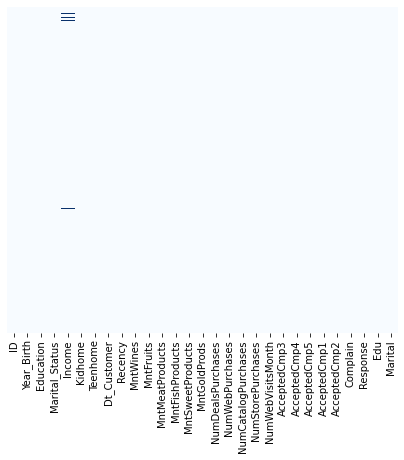

In [23]:
# CHECK FOR MISSING DATA
plt.figure(figsize = (7,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

It looks like we have some missing data in the Income column. Let's confirm how many rows exactly have null values.

In [24]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Edu                     0
Marital                 0
dtype: int64

### Income

There are 24 rows under the Income feature with missing values.

Let's see if we can fill those values based on the correlation of the Income feature with other features.

In [25]:
df.corr()['Income'].sort_values(ascending=False)

Income                 1.000000
NumCatalogPurchases    0.589162
MntMeatProducts        0.584633
MntWines               0.578650
NumStorePurchases      0.529362
MntSweetProducts       0.440744
MntFishProducts        0.438871
MntFruits              0.430842
NumWebPurchases        0.387878
AcceptedCmp5           0.335943
MntGoldProds           0.325916
AcceptedCmp1           0.276820
AcceptedCmp4           0.184400
Response               0.133047
Edu                    0.120692
AcceptedCmp2           0.087545
Marital                0.023956
Teenhome               0.019133
ID                     0.013095
Recency               -0.003970
AcceptedCmp3          -0.016174
Complain              -0.027225
NumDealsPurchases     -0.083101
Year_Birth            -0.163592
Kidhome               -0.428669
NumWebVisitsMonth     -0.553088
Name: Income, dtype: float64

Income has a 0.58 correlation with NumCatalogPurchases. This means that customers with the highest incomes make the highest number of purchases with catalogs.

We will group our dataframe by the number of catalog purchases and calculate the mean income per NumCatalogPurchases value.

In [26]:
numcatalog_avg = df.groupby('NumCatalogPurchases').mean()['Income']

In [27]:
numcatalog_avg

NumCatalogPurchases
0      32898.571181
1      41412.802846
2      54216.883212
3      64390.928571
4      67617.657459
5      68652.284672
6      74335.351562
7      76627.329114
8      71385.727273
9      77524.404762
10     75040.531915
11     77959.526316
22    157243.000000
28    106798.666667
Name: Income, dtype: float64

Let's fill in the missing income values based on the NumCatalogPurchases average value. Essentially, if the income value is missing, we will replace the null value with average income value corresponding to its catalog purchases value. We will do this with a function and an apply method.

In [28]:
def fill_income(numcatalogpurchases,income):
    
    if np.isnan(income):
        return round(numcatalog_avg[numcatalogpurchases])
    else:
        return income

We will store our results in a placeholder column so we can confirm and compare the changes with the original Income values.

In [29]:
df['Income_2'] = df.apply(lambda x: fill_income(x['NumCatalogPurchases'],x['Income']), axis=1)

Let's compare the values from the old and new columns. We'll compare results with the null values first.

In [30]:
df[df['Income'].isnull()][['Income','Income_2']].head()

,Income,Income_2
10,NaN,32899.0
27,NaN,32899.0
43,NaN,64391.0
48,NaN,41413.0
58,NaN,32899.0


We can see the null values have been replaced. Let's now confirm that the non-null values haven't been changed.

In [31]:
df[df['Income'].notnull()][['Income','Income_2']].head()

,Income,Income_2
0,58138.0,58138.0
1,46344.0,46344.0
2,71613.0,71613.0
3,26646.0,26646.0
4,58293.0,58293.0


We can now assign the old Income feature to our placeholder feature before deleting it.

In [32]:
df['Income'] = df['Income_2']

In [33]:
df = df.drop('Income_2',axis=1)

One more thing: Because the model only takes in integer values, we have to convert our Income values to integers from float.

In [34]:
df['Income'] = df['Income'].apply(lambda x:int(x))

In [35]:
df['Income'].head()

0    58138
1    46344
2    71613
3    26646
4    58293
Name: Income, dtype: int64

To confirm we no longer have missing values:

<AxesSubplot:>

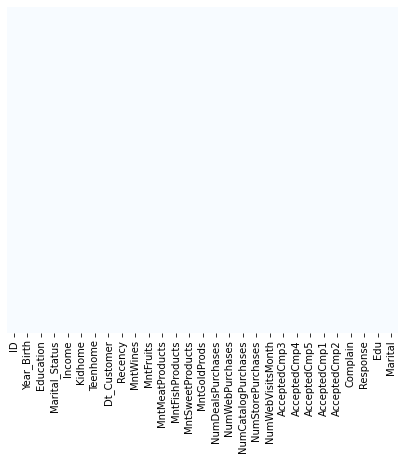

In [36]:
plt.figure(figsize = (7,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [37]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Edu                    0
Marital                0
dtype: int64

## Feature Engineering

### Year_Birth

Let's make a separate feature for Customer Age that subtracts 2022 from the year of their birth.

In [38]:
df['Customer_Age'] = 2022 - df['Year_Birth']

In [39]:
df['Customer_Age'].head()

0    65
1    68
2    57
3    38
4    41
Name: Customer_Age, dtype: int64

### Dt_Customer

The 'Dt_Customer' is currently a string object and cannot be used by our model. 

In [40]:
type(df['Dt_Customer'][0])

str

We can feature engineer a Customer_Period column out of it that can tell us the number of years the customer has patronised the business. This is a better option that doing away with the column.

The first thing to do is convert the column to a datetime object.

In [41]:
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d'))

We can separate the year, month, and date components and storee them in different columns.

In [42]:
df['Dt_Customer_Yr'] = pd.DatetimeIndex(df['Dt_Customer']).year
df['Dt_Customer_Mnth'] = pd.DatetimeIndex(df['Dt_Customer']).month
df['Dt_Customer_Day'] = pd.DatetimeIndex(df['Dt_Customer']).day

To confirm our operation:

In [43]:
df[['Dt_Customer','Dt_Customer_Yr','Dt_Customer_Mnth','Dt_Customer_Day']].head()

,Dt_Customer,Dt_Customer_Yr,Dt_Customer_Mnth,Dt_Customer_Day
0,2012-09-04,2012,9,4
1,2014-03-08,2014,3,8
2,2013-08-21,2013,8,21
3,2014-02-10,2014,2,10
4,2014-01-19,2014,1,19


We can now create a Customer_Period column taht subtracts 2022 from Dt_Customer_Yr to get the number of years of customer patronage.

In [44]:
df['Customer_Period'] = 2022 - df['Dt_Customer_Yr']

Let's confirm all our changes:

In [45]:
df[['Dt_Customer','Dt_Customer_Yr','Dt_Customer_Mnth','Dt_Customer_Day','Customer_Period']].head()

,Dt_Customer,Dt_Customer_Yr,Dt_Customer_Mnth,Dt_Customer_Day,Customer_Period
0,2012-09-04,2012,9,4,10
1,2014-03-08,2014,3,8,8
2,2013-08-21,2013,8,21,9
3,2014-02-10,2014,2,10,8
4,2014-01-19,2014,1,19,8


### MntTotal

Let's combine product spend in one single column by adding up customer spend from the different products.

In [46]:
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [47]:
df['MntTotal'].head()

0    1617
1      27
2     776
3      53
4     422
Name: MntTotal, dtype: int64

## Exploratory Data Analysis

In [48]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Edu', 'Marital',
       'Customer_Age', 'Dt_Customer_Yr', 'Dt_Customer_Mnth', 'Dt_Customer_Day',
       'Customer_Period', 'MntTotal'],
      dtype='object')

## Continuous Visualizations

Let's observe the distributions of some continuous features.

### Income

(array([5.580e+02, 1.116e+03, 5.530e+02, 5.000e+00, 7.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1730. ,  34976.8,  68223.6, 101470.4, 134717.2, 167964. ,
        201210.8, 234457.6, 267704.4, 300951.2, 334198. , 367444.8,
        400691.6, 433938.4, 467185.2, 500432. , 533678.8, 566925.6,
        600172.4, 633419.2, 666666. ]),
 <BarContainer object of 20 artists>)

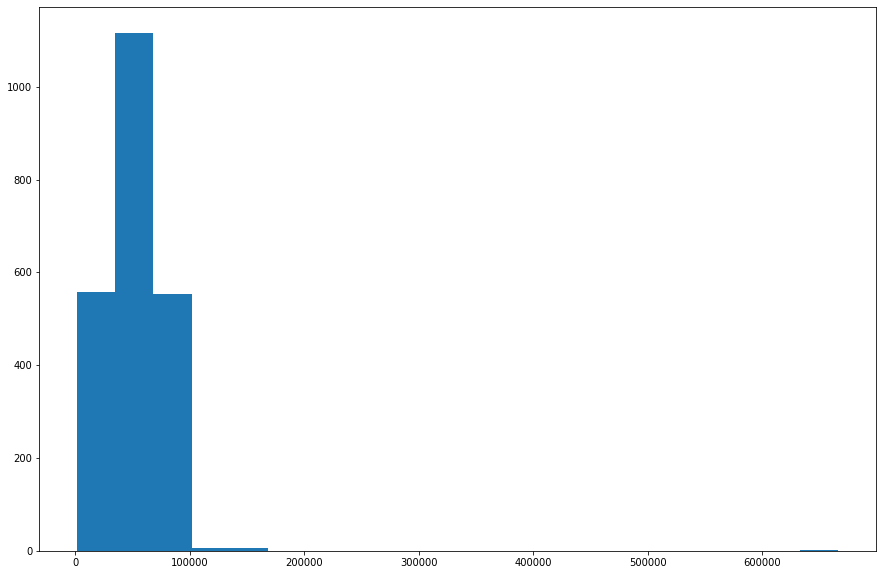

In [49]:
plt.figure(figsize=(15,10))
plt.hist(x=df['Income'],bins=20)

Incomes are clustered around USD5,000 per the plot. We can also notice the USD666,666 outlier identifed earlier in the summary statistics. We also have some other outliers that are much closer to the cluster. We can isolate all these outliers at about USD120,000 to get a proper view of the income distribution.

(array([ 11.,  26.,  61., 124., 141., 202., 208., 196., 174., 179., 181.,
        192., 174., 158., 126.,  48.,  24.,   4.,   2.,   1.]),
 array([  1730. ,   7330.2,  12930.4,  18530.6,  24130.8,  29731. ,
         35331.2,  40931.4,  46531.6,  52131.8,  57732. ,  63332.2,
         68932.4,  74532.6,  80132.8,  85733. ,  91333.2,  96933.4,
        102533.6, 108133.8, 113734. ]),
 <BarContainer object of 20 artists>)

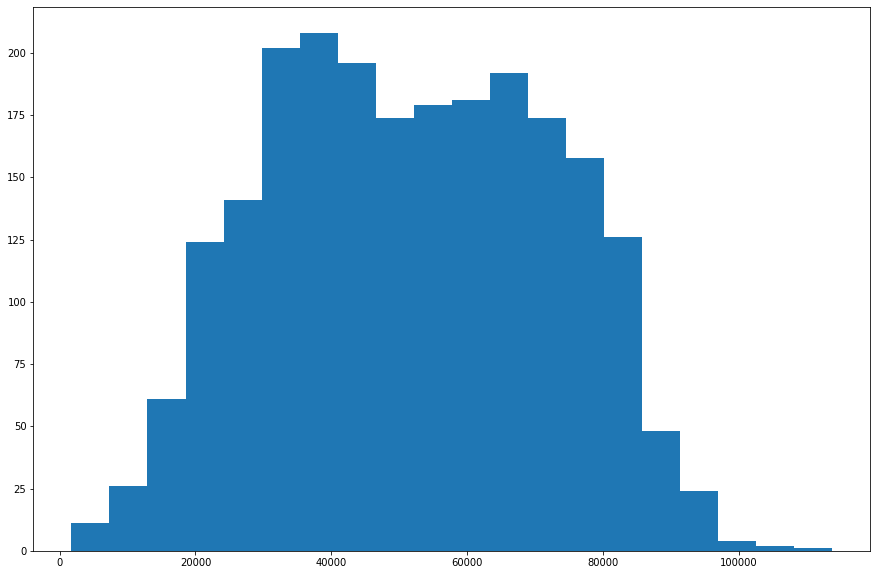

In [50]:
plt.figure(figsize=(15,10))
plt.hist(x=df[df['Income']<=120000]['Income'],bins=20)

We now have a much clearer picture of the incomes of our customers and can observe a more noticeable cluster between USD20,000 and USD83,000.

### Recency

(array([233., 223., 236., 214., 216., 234., 213., 224., 229., 218.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

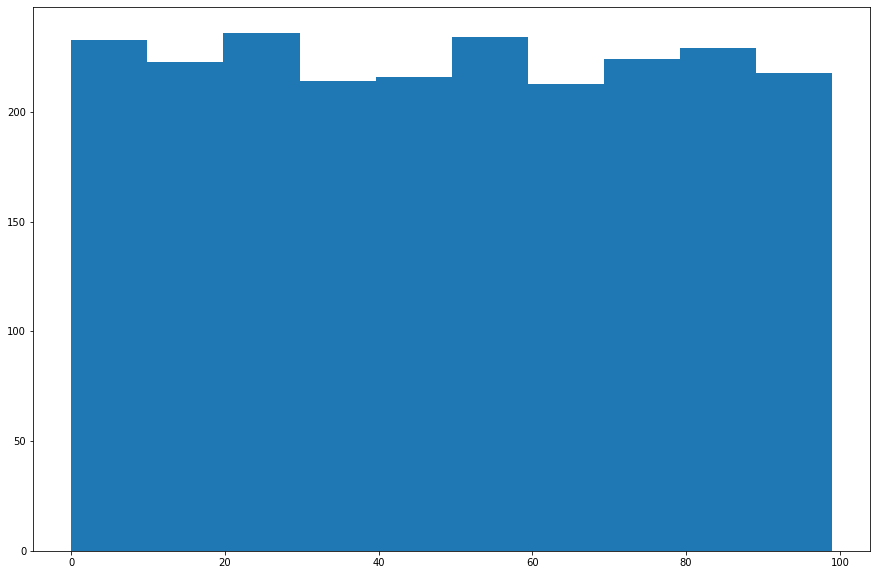

In [51]:
plt.figure(figsize=(15,10))
plt.hist(x=df['Recency'])

There isn't a noticeable cluster in the recency distribution as we can see a degree of evenness in distribution across all the recency values. 

### MntTotal

(array([964., 291., 182., 215., 209., 144., 122.,  69.,  32.,  12.]),
 array([   5.,  257.,  509.,  761., 1013., 1265., 1517., 1769., 2021.,
        2273., 2525.]),
 <BarContainer object of 10 artists>)

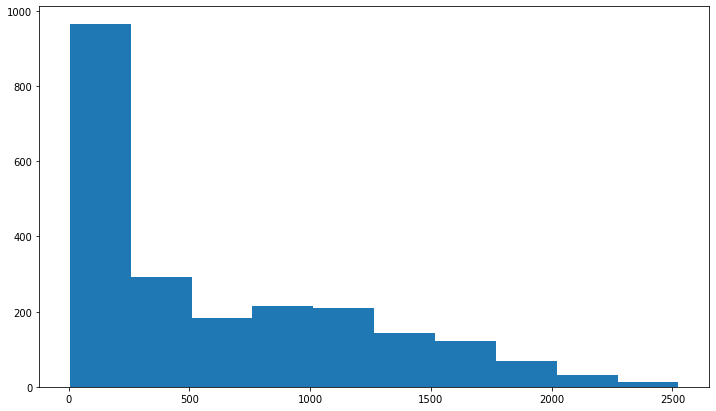

In [52]:
plt.figure(figsize=(12,7))
plt.hist(x=df['MntTotal'])

We can infer a bulk of the customers (~970) have spent a total of ~ USD250 to USD300 on average on products from the business.

## Continuous Visualizations

Let's now visualize some categorical features.

### Education Countplot 

<AxesSubplot:title={'center':'Individual Count per Education Category'}, xlabel='count', ylabel='Education'>

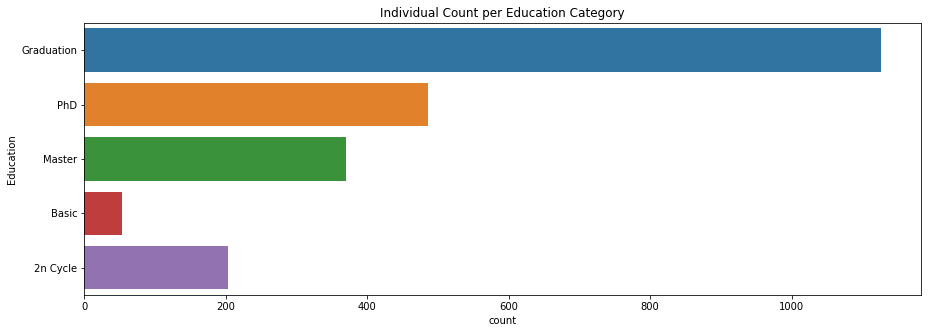

In [53]:
plt.figure(figsize=(15,5))
plt.title('Individual Count per Education Category')
sns.countplot(y='Education',data=df)

In [54]:
print('Individual Count per Education Category:')

for category in df['Education'].unique():
    count = len(df[df['Education']==category])
    print('{} - {}'.format(category,count))

Individual Count per Education Category:
Graduation - 1127
PhD - 486
Master - 370
Basic - 54
2n Cycle - 203


Customers with Graduation (Bachelors Degrees) make up the majority of the dataset. It is interesting to note that the Graduation category outnumbers the combination of the other Education categories.

### Marital Countplot

<AxesSubplot:title={'center':'Individual Count per Marital Category'}, xlabel='count', ylabel='Marital_Status'>

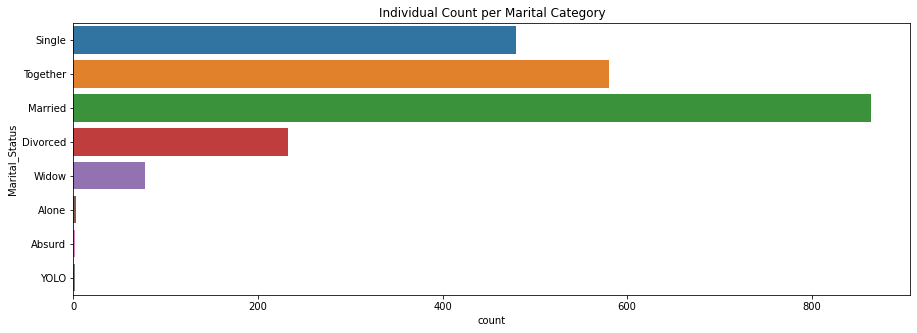

In [55]:
plt.figure(figsize=(15,5))
plt.title('Individual Count per Marital Category')
sns.countplot(y='Marital_Status',data=df)

In [56]:
print('Individuals Count per Marital Category:')

for category in df['Marital_Status'].unique():
    count = len(df[df['Marital_Status']==category])
    print('{} - {}'.format(category,count))

Individuals Count per Marital Category:
Single - 480
Together - 580
Married - 864
Divorced - 232
Widow - 77
Alone - 3
Absurd - 2
YOLO - 2


Married people are the highest demographic in the Marital column. The smallest demographics (Alone, Absurd, YOLO) seem like a very negligible fraction of the dataset. 

### Category Percentages - Education

In [57]:
print('Category Percentage of Customer Count (Education):')

for category in df['Education'].unique():
    cat_pct = 100 * (len(df[df['Education']==category]) / len(df))
    cat_pct = round(cat_pct,2)
    print('{} - {}%'.format(category,cat_pct))

Category Percentage of Customer Count (Education):
Graduation - 50.31%
PhD - 21.7%
Master - 16.52%
Basic - 2.41%
2n Cycle - 9.06%


<AxesSubplot:title={'center':'Category Percentage of Customer Count (Education)'}, xlabel='Education'>

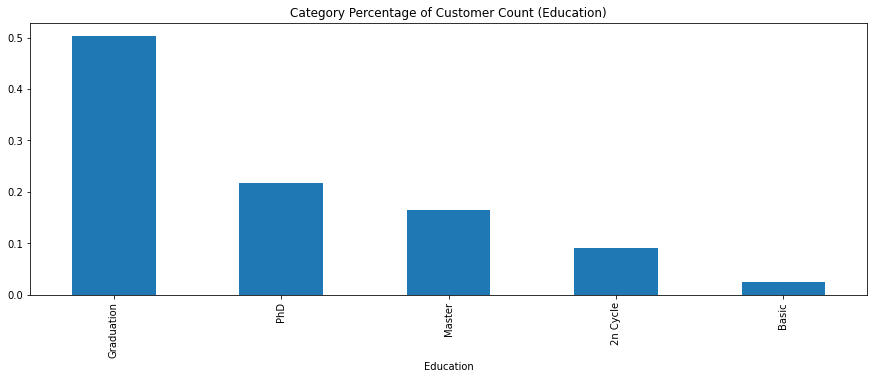

In [58]:
plt.figure(figsize=(15,5))
pct_cat = (df.groupby('Education').count()['ID'] / len(df)).sort_values(ascending=False)
pct_cat.plot(kind='bar',title='Category Percentage of Customer Count (Education)')

### Category Percentages - Marital Status

In [59]:
print('Category Percentage of Customer Count (Marital):')

for category in df['Marital_Status'].unique():
    cat_pct = 100 * (len(df[df['Marital_Status']==category]) / len(df))
    cat_pct = round(cat_pct,2)
    print('{} - {}%'.format(category,cat_pct))

Category Percentage of Customer Count (Marital):
Single - 21.43%
Together - 25.89%
Married - 38.57%
Divorced - 10.36%
Widow - 3.44%
Alone - 0.13%
Absurd - 0.09%
YOLO - 0.09%


<AxesSubplot:title={'center':'Category Percentage of Customer Count (Marital)'}, xlabel='Marital_Status'>

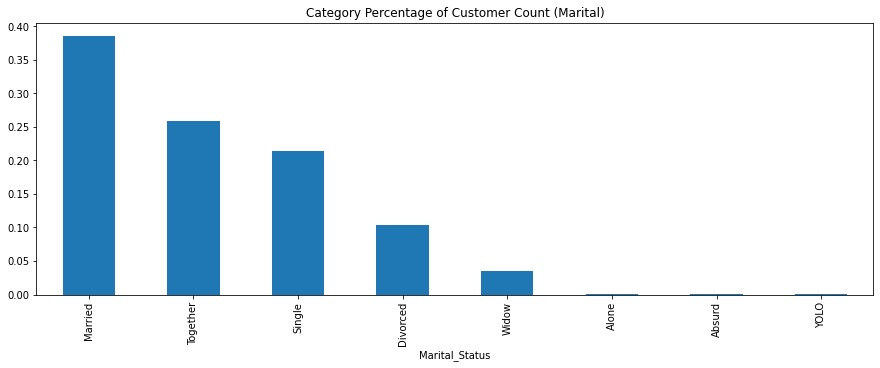

In [60]:
plt.figure(figsize=(15,5))
pct_cat = (df.groupby('Marital_Status').count()['ID'] / len(df)).sort_values(ascending=False)
pct_cat.plot(kind='bar',title='Category Percentage of Customer Count (Marital)')

### Average Income per Individual in Marital Category

<AxesSubplot:title={'center':'Average Income per Individual in Marital Category'}, xlabel='Income', ylabel='Marital_Status'>

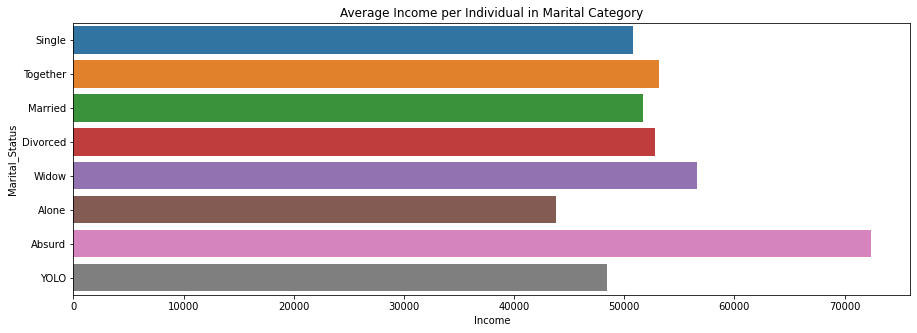

In [61]:
plt.figure(figsize=(15,5))
plt.title('Average Income per Individual in Marital Category')
sns.barplot(x='Income',y='Marital_Status',data=df,ci=None)

In [62]:
print('Average Income per Individual in Marital Category:')

for category in df['Marital_Status'].unique():
    avg_income = df.groupby('Marital_Status').mean()['Income'][category]
    avg_income = round(avg_income)
    print('{} - USD{:,}'.format(category,avg_income))

Average Income per Individual in Marital Category:
Single - USD50,823
Together - USD53,184
Married - USD51,700
Divorced - USD52,834
Widow - USD56,640
Alone - USD43,789
Absurd - USD72,366
YOLO - USD48,432


The Absurd group has the highest average income in the column even though it is just a negligible fraction of the customer count.

### Average Income per Individual in Education Category

<AxesSubplot:title={'center':'Average Income per Individual in Education Category'}, xlabel='Income', ylabel='Education'>

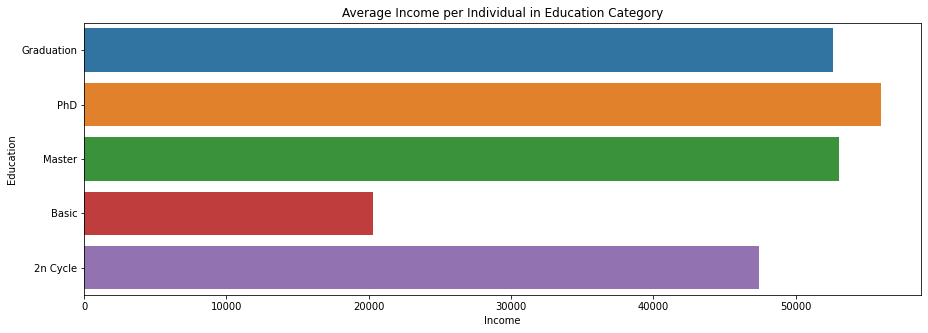

In [63]:
plt.figure(figsize=(15,5))
plt.title('Average Income per Individual in Education Category')
sns.barplot(x='Income',y='Education',data=df,ci=None)

In [64]:
print('Average Income per Individual in Education Category:')

for category in df['Education'].unique():
    avg_income = df.groupby('Education').mean()['Income'][category]
    avg_income = round(avg_income)
    print('{} - USD{:,}'.format(category,avg_income))

Average Income per Individual in Education Category:
Graduation - USD52,641
PhD - USD56,032
Master - USD53,032
Basic - USD20,306
2n Cycle - USD47,415


### Average Product Spend per Individual in Education Category

<AxesSubplot:title={'center':'Average Product Spend per Individual in Education Category'}, xlabel='MntTotal', ylabel='Education'>

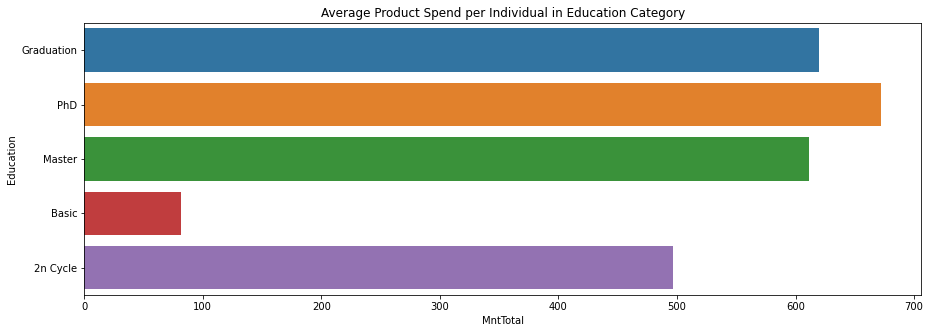

In [65]:
plt.figure(figsize=(15,5))
plt.title('Average Product Spend per Individual in Education Category')
sns.barplot(x='MntTotal',y='Education',data=df,ci=None)

In [66]:
print('Average Product Spend per Individual in Education Category:')

for category in df['Education'].unique():
    avg_income = df.groupby('Education').mean()['MntTotal'][category]
    avg_income = round(avg_income)
    print('{} - USD{:,}'.format(category,avg_income))

Average Product Spend per Individual in Education Category:
Graduation - USD620
PhD - USD672
Master - USD612
Basic - USD82
2n Cycle - USD497


### Average Product Spend per Individual in Marital Category

<AxesSubplot:title={'center':'Average Product Spend per Individual in Marital Category'}, xlabel='MntTotal', ylabel='Marital_Status'>

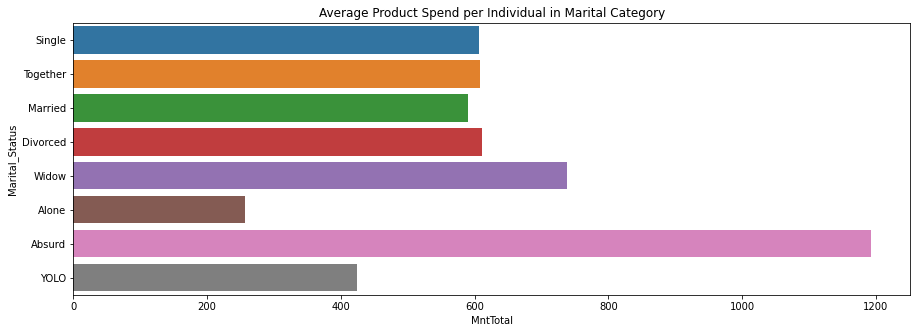

In [67]:
plt.figure(figsize=(15,5))
plt.title('Average Product Spend per Individual in Marital Category')
sns.barplot(x='MntTotal',y='Marital_Status',data=df,ci=None)

In [68]:
print('Average Product Spend per Individual in Marital Category:')

for category in df['Marital_Status'].unique():
    avg_income = df.groupby('Marital_Status').mean()['MntTotal'][category]
    avg_income = round(avg_income)
    print('{} - USD{:,}'.format(category,avg_income))

Average Product Spend per Individual in Marital Category:
Single - USD606
Together - USD608
Married - USD591
Divorced - USD611
Widow - USD739
Alone - USD257
Absurd - USD1,192
YOLO - USD424


Notice that the Absurd group still holds up spending-wise regardless of the fact that it is outnumbered in the database by a lot of the other groups. It is actually the group with the highest average product spend.

### Total Product Spend per Education Category

In [69]:
# TOTAL PRODUCT SPEND PER GROUP
print('Total Product Spend per Education Category:')

for category in df['Education'].unique():
    total_spend = df.groupby('Education').sum()['MntTotal'][category]
    total_spend = round(total_spend)
    print('{} - USD{:,}'.format(category,total_spend))

Total Product Spend per Education Category:
Graduation - USD698,626
PhD - USD326,791
Master - USD226,359
Basic - USD4,417
2n Cycle - USD100,795


<AxesSubplot:title={'center':'Total Product Spend per Education Category'}, xlabel='Education'>

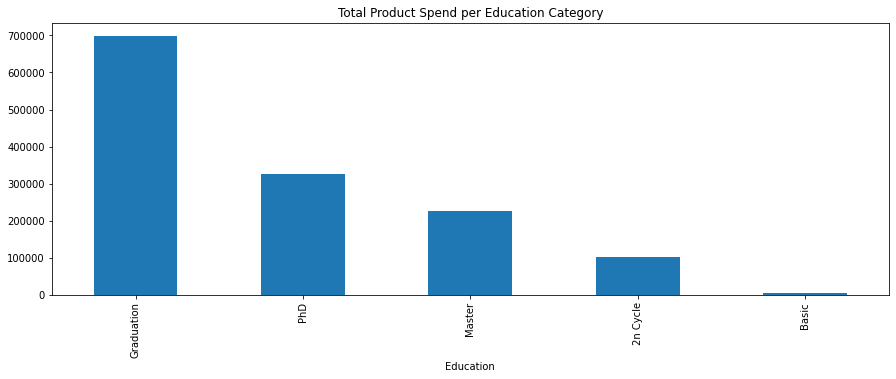

In [70]:
plt.figure(figsize=(15,5))
df.groupby('Education').sum()['MntTotal'].sort_values(ascending=False).plot(kind='bar',title='Total Product Spend per Education Category')

Observe how the Graduation and PhD groups (with the other categories) diverge in Total Product Spend even though their Average Product Spend figures are pretty close. This signals the effects of numbers and individual counts on total spending acrosss the Education groups. 

### Total Product Spend per Marital Category

In [71]:
print('Total Product Spend per Marital Category:')

for category in df['Marital_Status'].unique():
    total_spend = df.groupby('Marital_Status').sum()['MntTotal'][category]
    total_spend = round(total_spend)
    print('{} - USD{:,}'.format(category,total_spend))

Total Product Spend per Marital Category:
Single - USD291,112
Together - USD352,865
Married - USD510,453
Divorced - USD141,666
Widow - USD56,889
Alone - USD770
Absurd - USD2,385
YOLO - USD848


<AxesSubplot:title={'center':'Total Product Spend per Marital Category'}, xlabel='Marital_Status'>

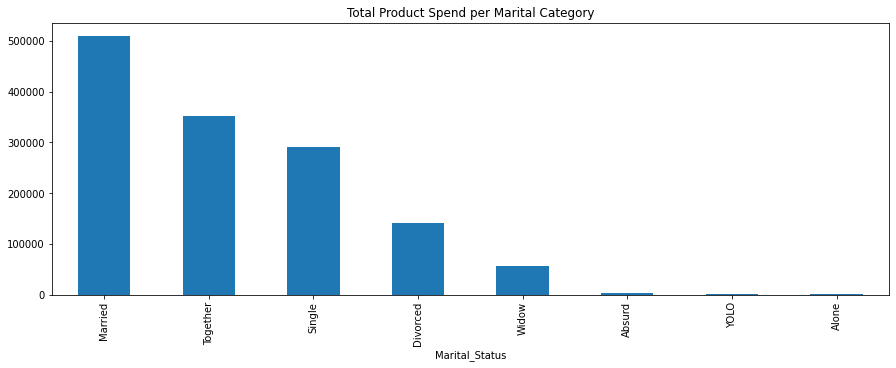

In [72]:
plt.figure(figsize=(15,5))
df.groupby('Marital_Status').sum()['MntTotal'].sort_values(ascending=False).plot(kind='bar',title='Total Product Spend per Marital Category')

Product Spend expectedly imitates the marital countplot. This is because more money would typically come in from categories with the highest numbers. The USD1,192 average spending per head from the Absurd category has been outdone by Total Product Spend from marital groups with high individual counts.

### Combined Incomes/Purchasing Power per Education Category

<AxesSubplot:title={'center':'Combined Incomes/Purchasing Power per Education Category'}, xlabel='Education'>

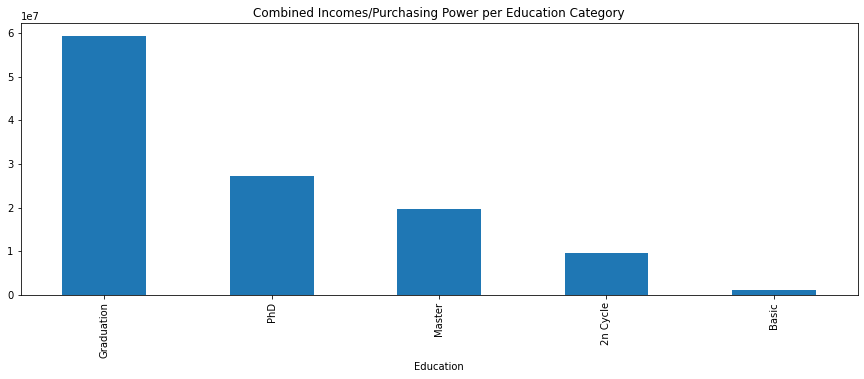

In [73]:
plt.figure(figsize=(15,5))
df.groupby('Education').sum()['Income'].sort_values(ascending=False).plot(kind='bar',title='Combined Incomes/Purchasing Power per Education Category')

In [74]:
print('Combined Incomes/Purchasing Power per Education Category:')

for category in df['Education'].unique():
    purch_power = df.groupby('Education').sum()['Income'][category]
    purch_power = round(purch_power)
    print('{} - USD{:,}'.format(category,purch_power))

Combined Incomes/Purchasing Power per Education Category:
Graduation - USD59,326,366
PhD - USD27,231,715
Master - USD19,621,841
Basic - USD1,096,538
2n Cycle - USD9,625,335


Incomes tend to track product spend in the Education feature. The highest earners in the columns are always typically the highest spenders at the business. An interesting thing to note, however, is the marginal difference between the average incomes of the Graduation and PhD niches isn't replicated in their combined purchasing power. The purchasing power of the Graduation group far outweighs the PhD group and the other categories.

### Combined Incomes/Purchasing Power per Marital Category

<AxesSubplot:title={'center':'Combined Incomes/Purchasing Power per Marital Category'}, xlabel='Marital_Status'>

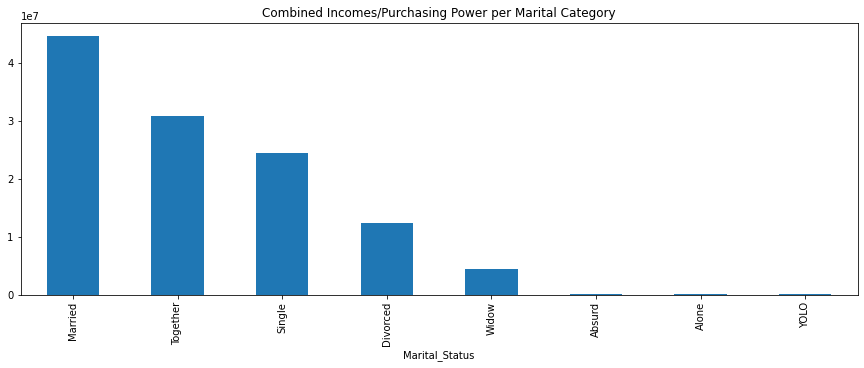

In [75]:
plt.figure(figsize=(15,5))
df.groupby('Marital_Status').sum()['Income'].sort_values(ascending=False).plot(kind='bar',title='Combined Incomes/Purchasing Power per Marital Category')

In [76]:
print('Combined Incomes/Purchasing Power per Marital Category:')

for category in df['Marital_Status'].unique():
    purch_power = df.groupby('Marital_Status').sum()['Income'][category]
    purch_power = round(purch_power)
    print('{} - USD{:,}'.format(category,purch_power))

Combined Incomes/Purchasing Power per Marital Category:
Single - USD24,394,913
Together - USD30,846,677
Married - USD44,668,452
Divorced - USD12,257,541
Widow - USD4,361,250
Alone - USD131,367
Absurd - USD144,731
YOLO - USD96,864


<AxesSubplot:title={'center':'Average Income per Individual in Marital Category'}, xlabel='Income', ylabel='Marital_Status'>

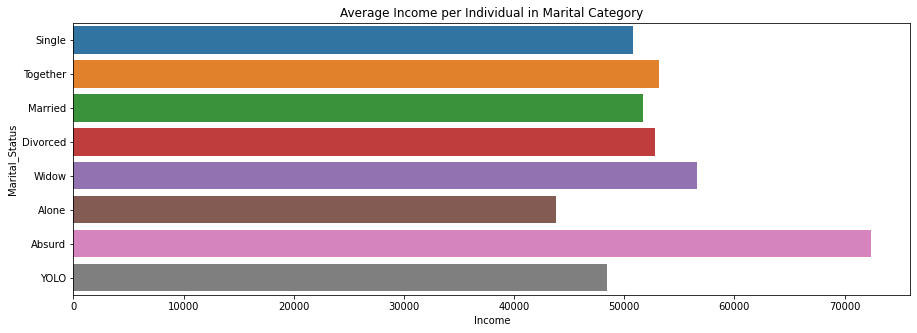

In [77]:
plt.figure(figsize=(15,5))
plt.title('Average Income per Individual in Marital Category')
sns.barplot(x='Income',y='Marital_Status',data=df,ci=None)

Although the Absurd group are the highest earners on average (~USD72,000), they have one of the least combined incomes as a group. We can see the effect of numbers with the Single, Together and Married groups who earn less on average but have the highest combined incomes and purchasing power.

### Recency Assesment per Marital Category

<AxesSubplot:title={'center':'Recency Assesment per Marital Category'}, xlabel='Recency', ylabel='Marital_Status'>

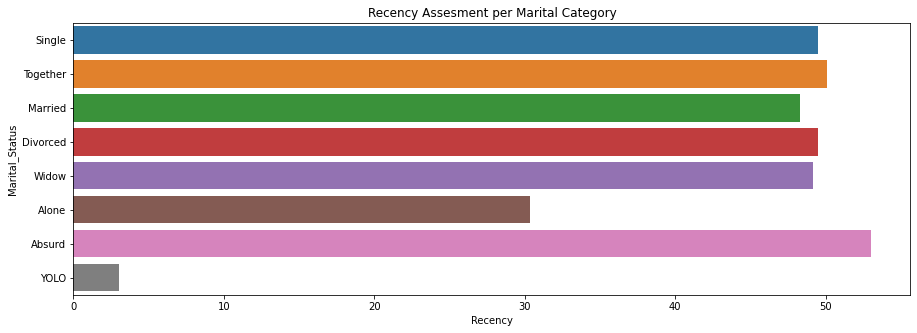

In [78]:
plt.figure(figsize=(15,5))
plt.title('Recency Assesment per Marital Category')
sns.barplot(x='Recency',y='Marital_Status',data=df,ci=None)

In [79]:
print('Recency Assesment per Marital Category:')

for category in df['Marital_Status'].unique():
    recency = df[df['Marital_Status']==category]['Recency'].mean()
    recency = round(recency)
    print('{} - {} days'.format(category,recency))

Recency Assesment per Marital Category:
Single - 50 days
Together - 50 days
Married - 48 days
Divorced - 49 days
Widow - 49 days
Alone - 30 days
Absurd - 53 days
YOLO - 3 days


The YOLO group have made the most recent purchases of all the Marital groups but they don't have the spending numbers or purchasing power numbers for their recency to mean anything financially meaningful for the business. 

The Married group which lags the YOLO group in recency has the highest combined income and spends more at the business.

### Recency Assesment per Education Category

In [80]:
print('Recency Assesment per Education Category')

for category in df['Education'].unique():
    recency = df[df['Education']==category]['Recency'].mean()
    recency = round(recency)
    print('{} - {} days'.format(category,recency))

Recency Assesment per Education Category
Graduation - 50 days
PhD - 48 days
Master - 48 days
Basic - 48 days
2n Cycle - 48 days


<AxesSubplot:title={'center':'Recency Assesment per Education Category'}, xlabel='Recency', ylabel='Education'>

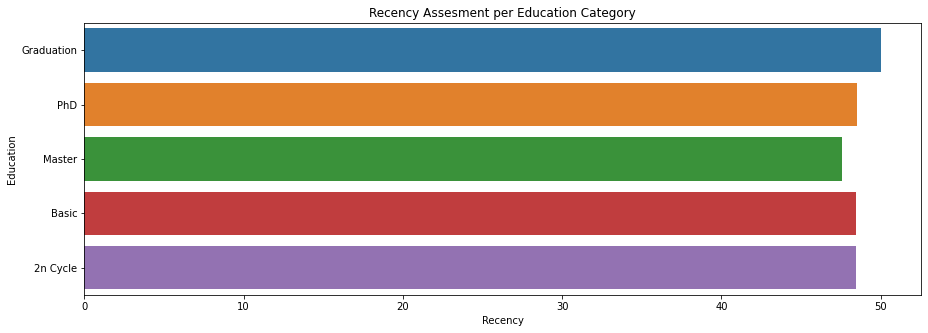

In [81]:
plt.figure(figsize=(15,5))
plt.title('Recency Assesment per Education Category')
sns.barplot(x='Recency',y='Education',data=df,ci=None)

It has been at least 48 days since anyone from any of the Recency categories made a purchase. It's hard to decide on the strength of this number considering we don't know enough about the nature of the business. A 48-day recency period could be impressive or dissapointing depending on the context. Some domain knowledge would be helpful in making this determination.

## Histograms for Continuous Columns

In [82]:
continuous_cols = ['Customer_Age','Income','Customer_Period','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','MntTotal','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

array([[<AxesSubplot:title={'center':'Customer_Age'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Customer_Period'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>],
       [<AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'MntTotal'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>],
       [<AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>]], dtype=object)

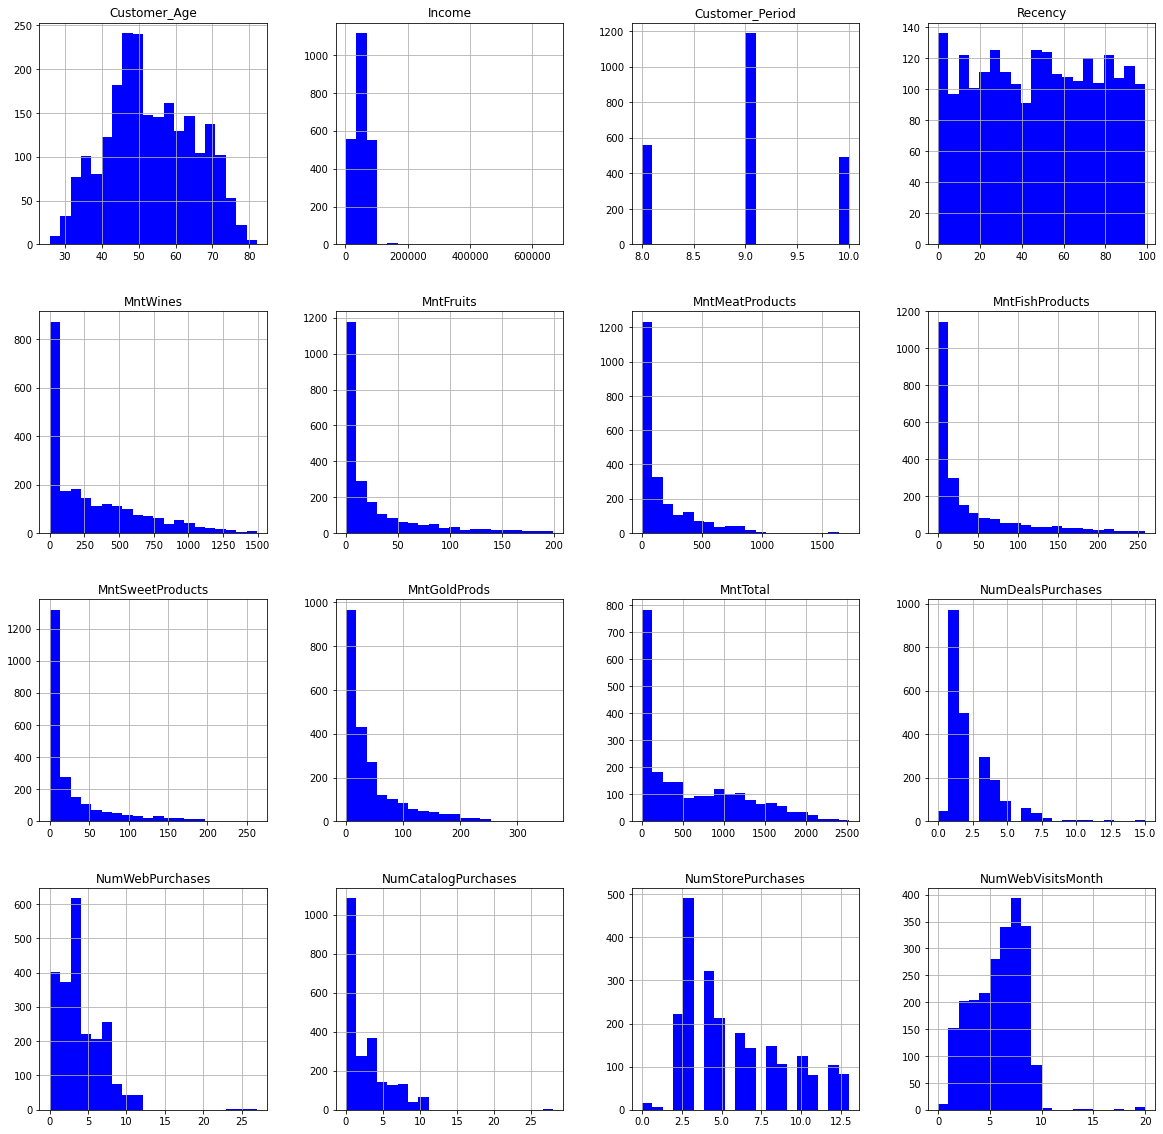

In [83]:
df[continuous_cols].hist(bins=20,figsize=(20,20),color='blue')

- Ages are clustered around 40 and 70.
- Customers spend less on average per product.
- Most customers have made ~ 9 to 10 web visits on average per month.
- The most popular sales channels with customers are Store Purchases and Web Purchases.

## Target Label Balance

<AxesSubplot:xlabel='Response', ylabel='count'>

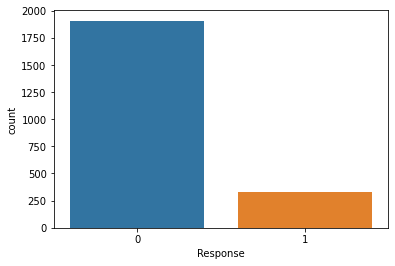

In [84]:
sns.countplot(x='Response',data=df)

In [85]:
ratio = len(df[df['Response']==1]) / len(df[df['Response']==0])
ratio = round(ratio,2)

acceptance_rate = len(df[df['Response']==1]) / len(df)
acceptance_rate = acceptance_rate * 100
acceptance_rate = round(acceptance_rate,2)

rejection_rate = len(df[df['Response']==0]) / len(df)
rejection_rate = rejection_rate * 100
rejection_rate = round(rejection_rate,2)

acceptance_number = len(df[df['Response']==1])
rejection_number = len(df[df['Response']==0])

print('Total Number of Surveyed Customers: {}'.format(len(df)))
print('Number of customers who accepted offer: {}'.format(acceptance_number))
print('Number of customers who rejected offer: {}'.format(rejection_number))
print('\n')
print('Ratio of accepted responses to rejected responses: {}'.format(ratio))
print('Acceptance Rate: {}%'.format(acceptance_rate))
print('Rejection Rate: {}%'.format(rejection_rate))

Total Number of Surveyed Customers: 2240
Number of customers who accepted offer: 334
Number of customers who rejected offer: 1906


Ratio of accepted responses to rejected responses: 0.18
Acceptance Rate: 14.91%
Rejection Rate: 85.09%


As indicated earlier, the imbalance in the labels will affect our recall and f-1 scores for the '1' class because our goal is an efficient model that can predict offer acceptances for us.

## Dataframe Split

Let's split the dataframe based on the labels.

In [86]:
accepted_df = df[df['Response']==1]
rejected_df = df[df['Response']==0]

In [87]:
accepted_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Response,Edu,Marital,Customer_Age,Dt_Customer_Yr,Dt_Customer_Mnth,Dt_Customer_Day,Customer_Period,MntTotal
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,...,334.000000,334.0,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,5421.820359,1969.416168,60234.952096,0.341317,0.305389,35.383234,502.703593,38.203593,294.353293,52.050898,...,0.008982,1.0,3.637725,2.479042,52.583832,2012.748503,6.739521,15.455090,9.251497,987.392216
std,3154.132439,12.398192,23163.835452,0.487347,0.492741,27.659499,427.183786,46.099519,286.890036,61.855885,...,0.094489,0.0,1.116575,1.305283,12.398192,0.690724,3.475499,8.704151,0.690724,719.009695
min,1.000000,1943.000000,7500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.0,1.000000,1.000000,26.000000,2012.000000,1.000000,1.000000,8.000000,17.000000
25%,2785.250000,1959.000000,39786.750000,0.000000,0.000000,11.000000,96.000000,4.000000,47.750000,4.000000,...,0.000000,1.0,3.000000,1.000000,43.000000,2012.000000,3.250000,8.000000,9.000000,252.000000
50%,5133.000000,1971.000000,64115.000000,0.000000,0.000000,30.000000,448.000000,21.000000,174.500000,25.000000,...,0.000000,1.0,3.000000,3.000000,51.000000,2013.000000,8.000000,16.000000,9.000000,1057.500000
75%,8127.750000,1979.000000,80477.000000,1.000000,1.000000,56.000000,875.500000,53.750000,509.750000,84.250000,...,0.000000,1.0,5.000000,3.000000,63.000000,2013.000000,10.000000,22.000000,10.000000,1617.000000
max,11133.000000,1996.000000,105471.000000,2.000000,2.000000,99.000000,1492.000000,193.000000,981.000000,250.000000,...,1.000000,1.0,5.000000,8.000000,79.000000,2014.000000,12.000000,31.000000,10.000000,2525.000000


In [88]:
rejected_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Response,Edu,Marital,Customer_Age,Dt_Customer_Yr,Dt_Customer_Mnth,Dt_Customer_Day,Customer_Period,MntTotal
count,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,...,1906.000000,1906.0,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000
mean,5622.009444,1968.766002,50778.237671,0.462225,0.541448,51.514690,269.104407,24.216684,144.624344,34.980063,...,0.009444,0.0,3.350997,2.500000,53.233998,2013.077125,6.419727,15.670514,8.922875,538.929171
std,3262.498976,11.623617,25157.841510,0.544975,0.545670,28.519092,305.159188,38.191763,205.299936,52.870253,...,0.096745,0.0,1.121066,1.028339,11.623617,0.671764,3.487376,8.807629,0.671764,553.103565
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,1.000000,26.000000,2012.000000,1.000000,1.000000,8.000000,5.000000
25%,2839.250000,1959.000000,34356.750000,0.000000,0.000000,27.000000,21.250000,1.000000,14.000000,2.000000,...,0.000000,0.0,3.000000,2.000000,45.000000,2013.000000,3.000000,8.000000,8.000000,62.000000
50%,5528.000000,1970.000000,50065.000000,0.000000,1.000000,52.000000,152.000000,7.000000,56.000000,11.000000,...,0.000000,0.0,3.000000,3.000000,52.000000,2013.000000,6.000000,16.000000,9.000000,314.000000
75%,8471.750000,1977.000000,66228.750000,1.000000,1.000000,77.000000,443.750000,28.000000,192.750000,43.000000,...,0.000000,0.0,4.000000,3.000000,63.000000,2014.000000,10.000000,23.000000,9.000000,956.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,0.0,5.000000,8.000000,82.000000,2014.000000,12.000000,31.000000,10.000000,2525.000000


Because some of the columns are hidden with the describe method, we can create our own function that describes any particular feature from both datatsets.

In [89]:
def compare_stats(col):
    p = pd.concat([rejected_df.describe()[col], accepted_df.describe()[col]],axis=1)
    p.columns = ['Rejected','Accepted']
    return p

Let's compare label statistics across some continous features.

In [90]:
compare_stats('Income')

,Rejected,Accepted
count,1906.000000,334.000000
mean,50778.237671,60234.952096
std,25157.841510,23163.835452
min,1730.000000,7500.000000
25%,34356.750000,39786.750000
50%,50065.000000,64115.000000
75%,66228.750000,80477.000000
max,666666.000000,105471.000000


Customers who accepted the offer earn more on average. They also have a minimum income of USD7,500 which is way larger than the minumum pay of USD1,730 for the Rejected group. Notice the customer who earned the USD666,666 outlier pay belongs in the Rejected category.

In [91]:
compare_stats('MntTotal')

,Rejected,Accepted
count,1906.000000,334.000000
mean,538.929171,987.392216
std,553.103565,719.009695
min,5.000000,17.000000
25%,62.000000,252.000000
50%,314.000000,1057.500000
75%,956.000000,1617.000000
max,2525.000000,2525.000000


Customers from the Accepted group also spend the most on average. We can hypothesize that offers (i.e. discount packages, promos, etc...) actually incentivise more spending. The minimum spending for the Accepted pool is also higher and the maximum spending is tied.

## Correlations

<AxesSubplot:>

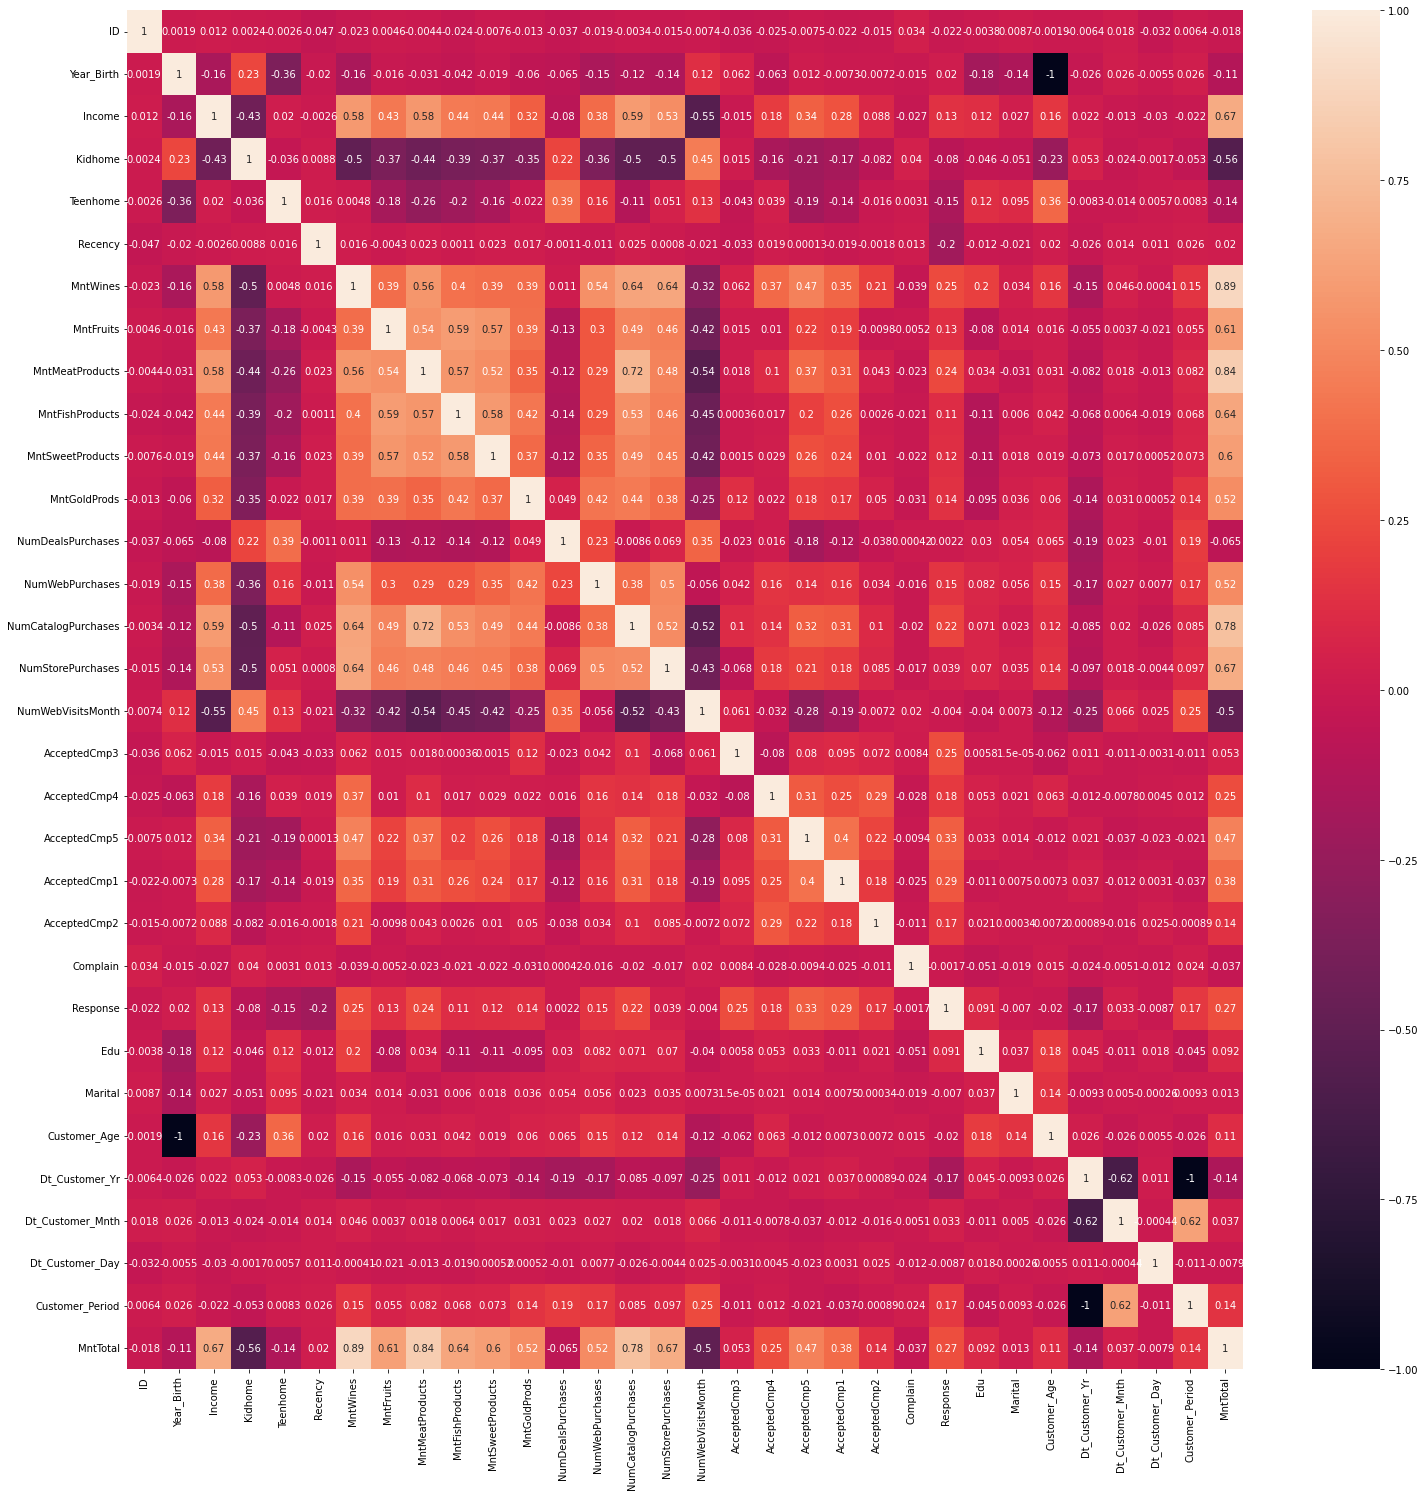

In [92]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)

Let's comment on some of the strong correlations.

## Positive Correlations

### MntWines & MntTotal

<AxesSubplot:xlabel='MntWines', ylabel='MntTotal'>

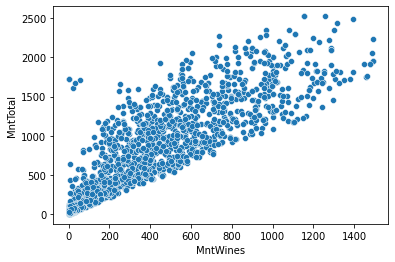

In [93]:
sns.scatterplot(x=df['MntWines'],y=df['MntTotal'])

The heatmap reveals a 0.89 correlation between MntWines and MntTotal. This fact is equally illustrated by the scatterplot between both features that shows a positive linear relationship. We can infer that customers who spend the most on wines have the highest product expenditures.

### MntMeatProducts & MntTotal

<AxesSubplot:xlabel='MntMeatProducts', ylabel='MntTotal'>

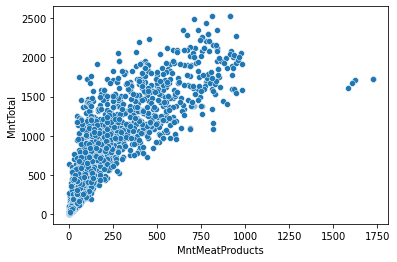

In [94]:
sns.scatterplot(x=df['MntMeatProducts'],y=df['MntTotal'])

There are 4 outlier points in the MntMeatProducts feature. We can exclude them from the scatterplot to display the true relationship.

<AxesSubplot:xlabel='MntTotal', ylabel='MntMeatProducts'>

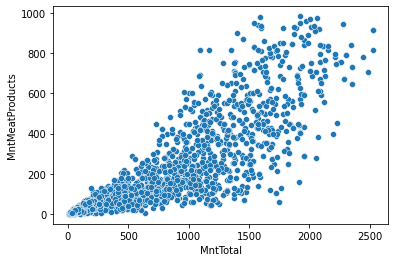

In [95]:
df_adjusted = df[df['MntMeatProducts']<=1250]
sns.scatterplot(x='MntTotal',y='MntMeatProducts',data=df_adjusted)

Now that the plot is clearer, we can hypothesize that customers with the highest product spends also spend the most money on meat products.

### MntTotal & NumCatalogPurchases

<AxesSubplot:xlabel='MntTotal', ylabel='NumCatalogPurchases'>

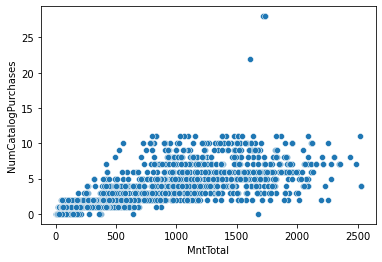

In [96]:
sns.scatterplot(x=df['MntTotal'],y=df['NumCatalogPurchases'])

With a strong correlation of 0.78, we can infer that the customers with the highest customer spend make the largest purchases through the catalog sales channel.

### Income and MntTotal

<AxesSubplot:xlabel='Income', ylabel='MntTotal'>

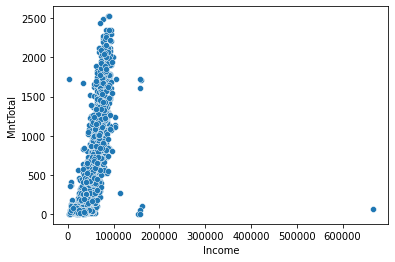

In [97]:
sns.scatterplot(x=df['Income'],y=df['MntTotal'])

To observe the true relationship, we have to re-do the plot without the income outliers. We consider any income values beyond USD120,000 to be an outlier. This operation won't affect the results considering the outliers are only a meagre 0.35% of the data.

<AxesSubplot:xlabel='Income', ylabel='MntTotal'>

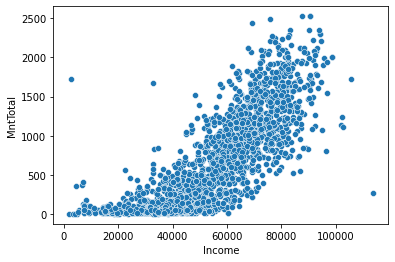

In [98]:
df_2 = df[df['Income']<=120000]
sns.scatterplot(x=df_2['Income'],y=df_2['MntTotal'])

We now have a much clearer plot detailing the strong relationship between Income and MntTotal. We can safely hypothesize that customers with the highest incomes have the highest customer spend.

## Negative Correlations

### MntTotal & NumWebVisitsMonth

<AxesSubplot:xlabel='MntTotal', ylabel='NumWebVisitsMonth'>

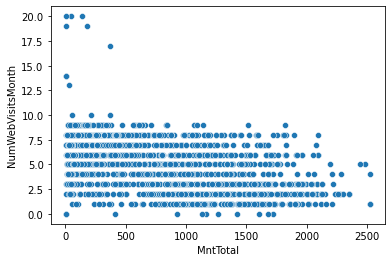

In [99]:
sns.scatterplot(x='MntTotal',y='NumWebVisitsMonth',data=df)

We see web visits are not exactly a consistent activity with customers who make the largest purchases. Let's see of this sentiment is replicated with their online shopping habits.

<AxesSubplot:xlabel='MntTotal', ylabel='NumWebPurchases'>

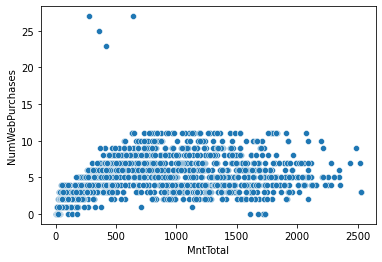

In [100]:
sns.scatterplot(x='MntTotal',y='NumWebPurchases',data=df)

Ironically, total product spending has a positive correlation of 0.52 with web purchases but it is ranks third of all the sales channels proving the point that customers who spend more are a lot habitual/frequent with other sales channels.

### Income and NumWebVisitsMonth

<AxesSubplot:xlabel='Income', ylabel='NumWebVisitsMonth'>

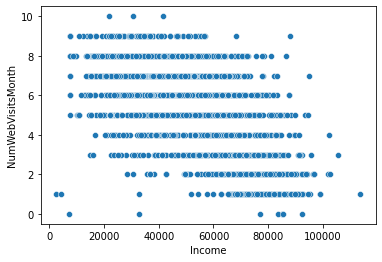

In [101]:
sns.scatterplot(x='Income',y='NumWebVisitsMonth',data=df[(df['Income']<=120000) & ((df['NumWebVisitsMonth']<=11))])

We notice that customers with the highest incomes are not frequent visitors of the store's website. This relationship makes sense when you consider that customers with the highest incomes make the largest purchases and the customers with the largest purchases are not frequent visitors on the website. 

Note that we've isolated some income outliers from the plot so we can get a proper/unbiased sense of the true relationship.

### NumCatalogPurchases & NumWebVisitsMonth

<AxesSubplot:xlabel='NumCatalogPurchases', ylabel='NumWebVisitsMonth'>

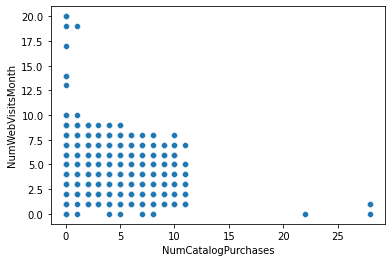

In [102]:
sns.scatterplot(x='NumCatalogPurchases',y='NumWebVisitsMonth',data=df)

We can infer from this plot customers who make the most catalog purchases are the least frequent visitors on the website. That would suggest the store's catalog system currently offers an adequacy of product options and some shopping convenience for customers.

## Histograms - Categorical Features

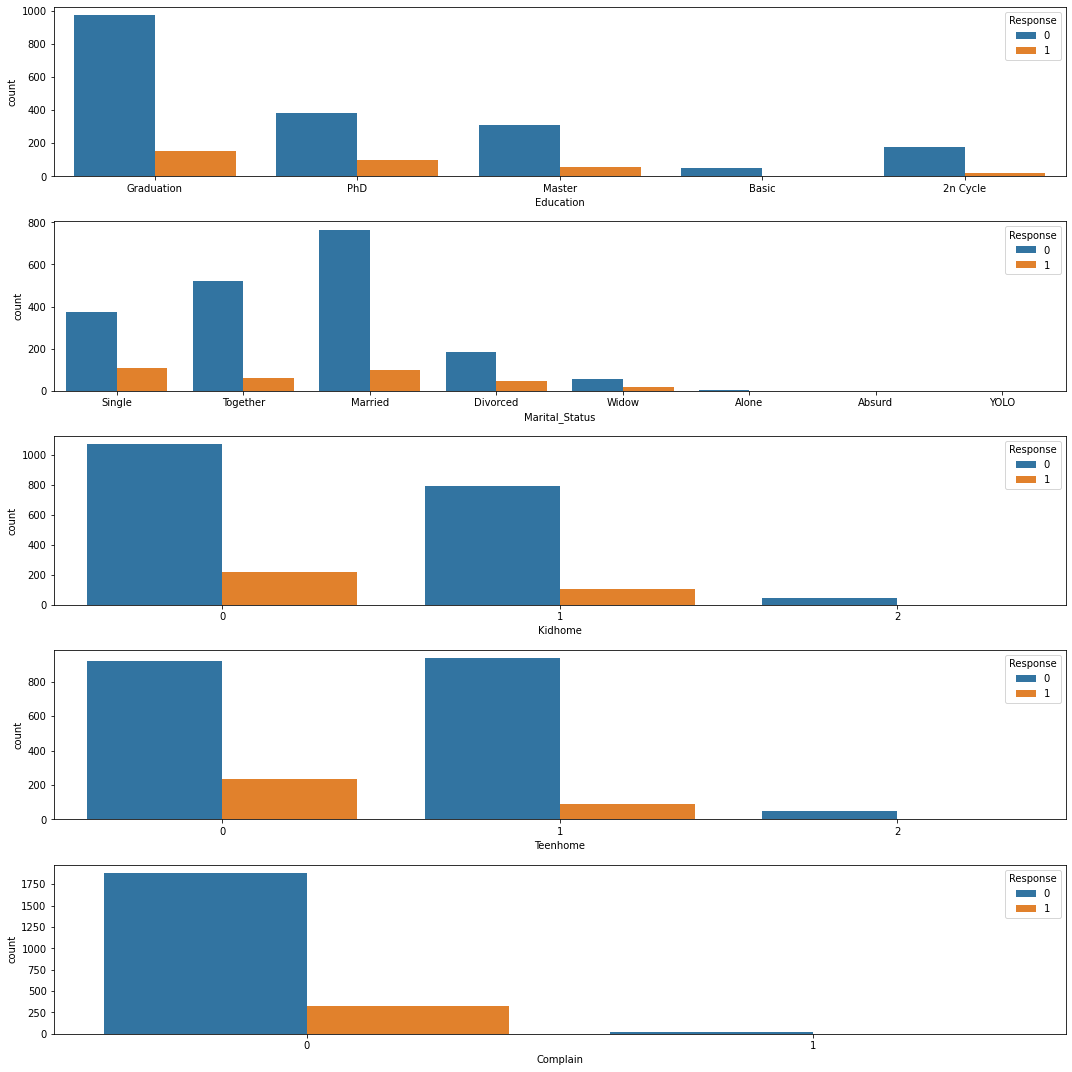

In [103]:
nums = [511,512,513,514,515]
plt.figure(figsize = (15, 15))
for col,num in zip(['Education','Marital_Status','Kidhome','Teenhome','Complain'],nums):
    plt.subplot(num)
    sns.countplot(x=col,hue='Response',data=df)
plt.tight_layout()

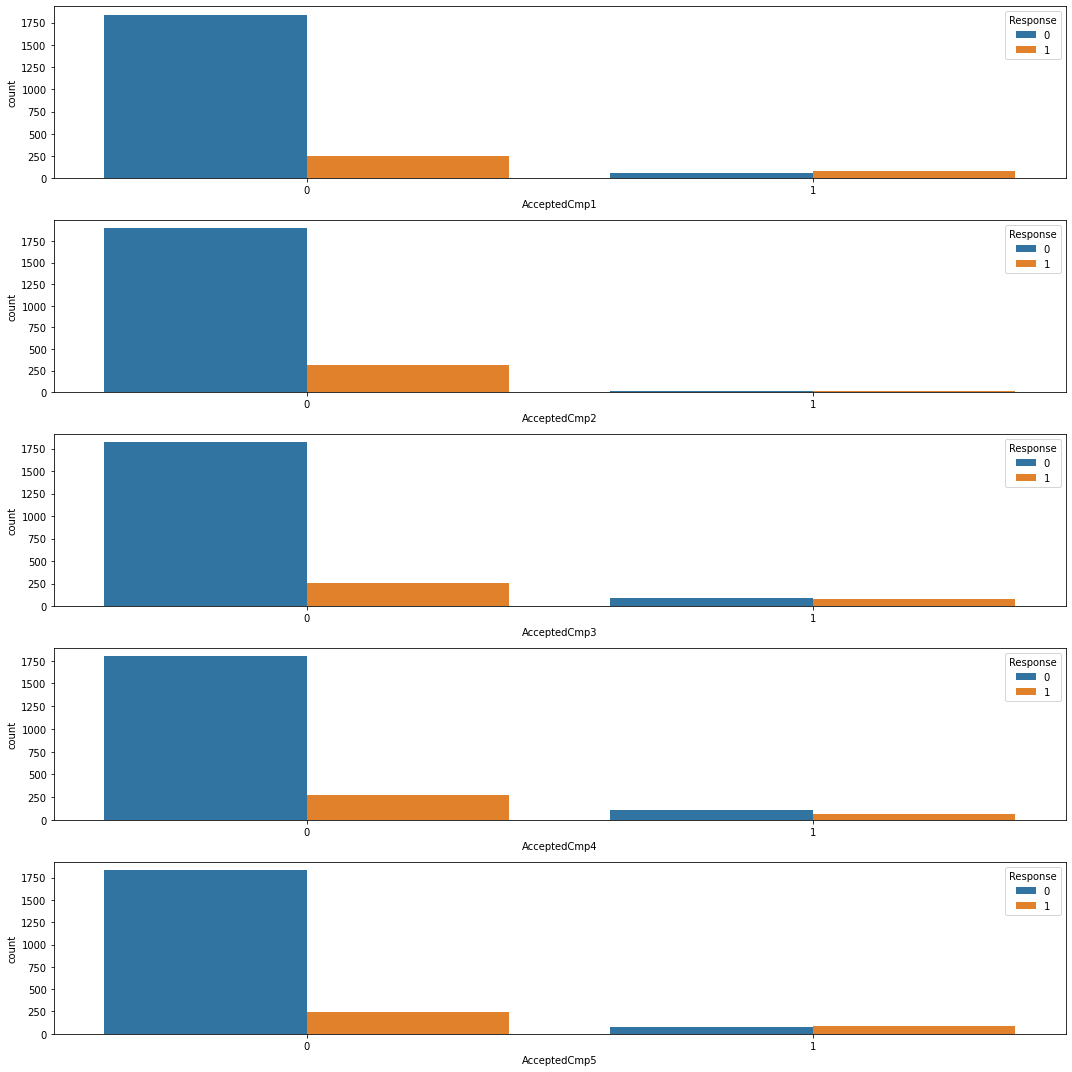

In [104]:
nums = [511,512,513,514,515]
plt.figure(figsize = (15, 15))
for col,num in zip(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'],nums):
    plt.subplot(num)
    sns.countplot(x=col,hue='Response',data=df)
plt.tight_layout()

## KDE Plots - Continuous Features (Labels)

Let's define a function that combines the two kde plots for the different labels and plots the distributions of the continous columns. The plots will two different colors - red for customers who rejected the offer (0) and blue for customers who accepted the offer (1).

In [105]:
def kde_plot(col):
    plt.figure(figsize=(12,7))
    sns.kdeplot(rejected_df[col],label='Customers who rejected',shade=True,color='r')
    sns.kdeplot(accepted_df[col],label='Customers who accepted',shade=True,color='b')
    plt.xlabel(col)

### Income

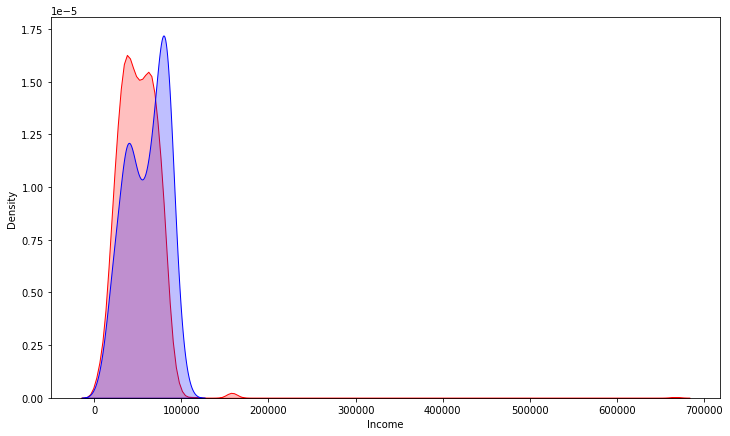

In [106]:
kde_plot('Income')

The '0' group has a larger density of customers who earn less than ~ USD90,000. Most people in the '1' category earn higher.

### Recency

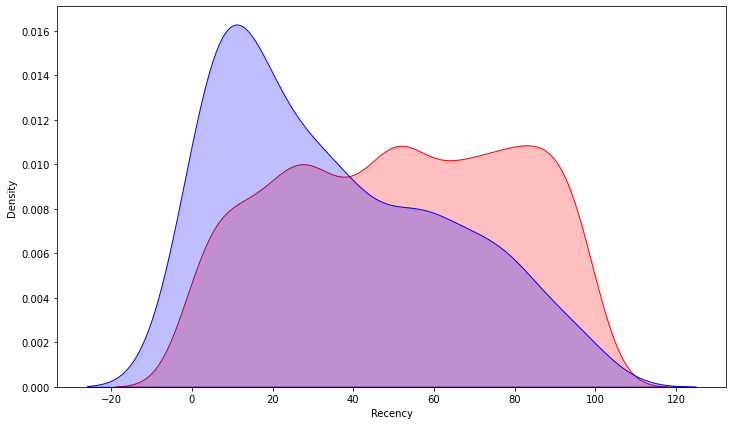

In [107]:
kde_plot('Recency')

The recency of the '1' group looks stronger than that of the '0' group. The '1' group has more people with impressive recencies. We can see the recency tail off as the number of days increases on the plot. We can then hypothesise that offers incentivise spending frequency and improve customer recency.

### MntTotal

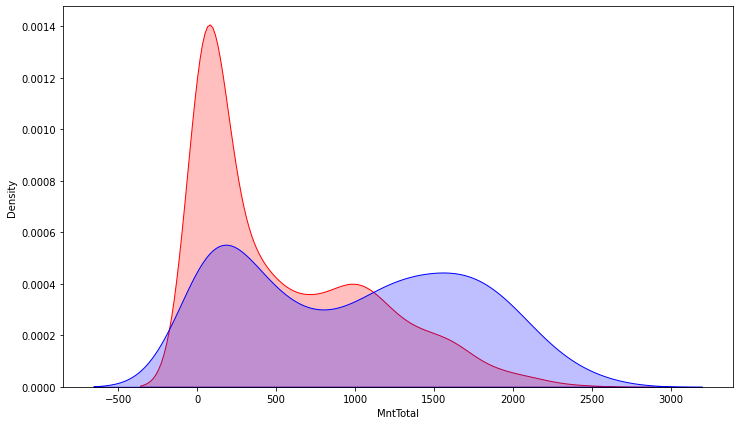

In [108]:
kde_plot('MntTotal')

The '0' group spends less on store products but has a higher density than the '1' group which has a higher density towards the right part of the plot. At higher MntTotal amounts, we tend to see more spending coming from the '1' group.

### NumDealsPurchases

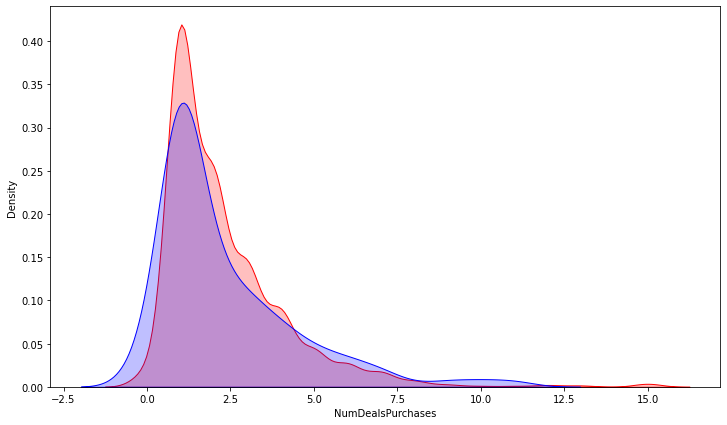

In [109]:
kde_plot('NumDealsPurchases')

There are significant differences in the distributions for deals purchases for both customer labels. The only noticeable difference in the plots, interestingly, is where they both peak at the same number of deals purchases. At that point, the '0' group has a higher density of customers who use deals than the '1' group.

### NumWebPurchases

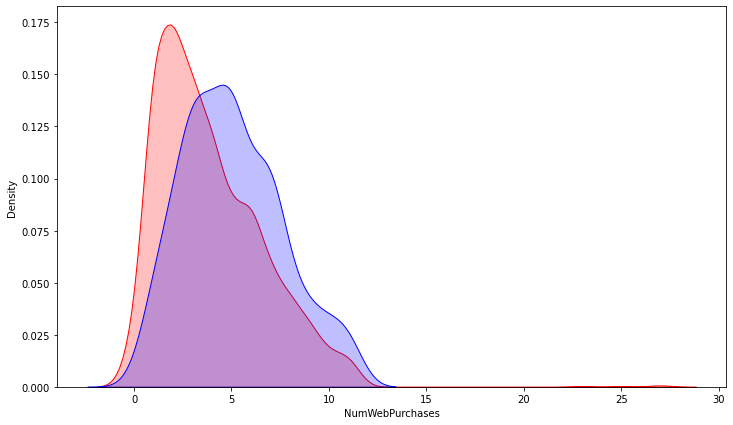

In [110]:
kde_plot('NumWebPurchases')

The '0' category has more customers who don't make as many online purchases (at least until ~3.5 or 4 purchases). The '1' category has more customers with higher web purchases.

### NumCatalogPurchases

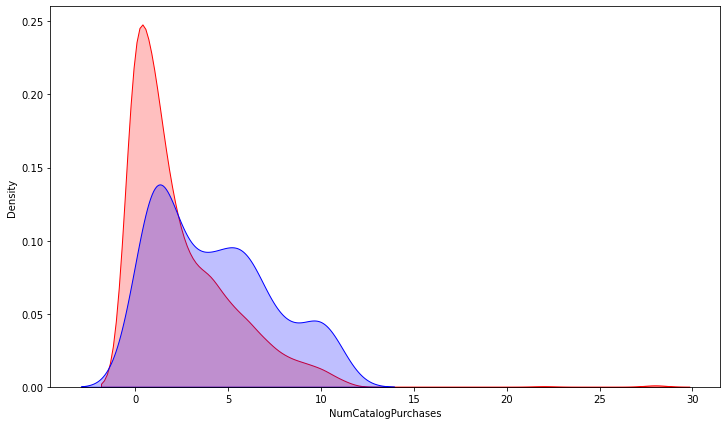

In [111]:
kde_plot('NumCatalogPurchases')

The '1' category has more customers who make at least 4 catalog purchases. However, their density tails in comparison to the '0' group with more customers who make less than 4 catalog purchases. Both plots tend to peak at ~1.9 to 2.

### NumStorePurchases

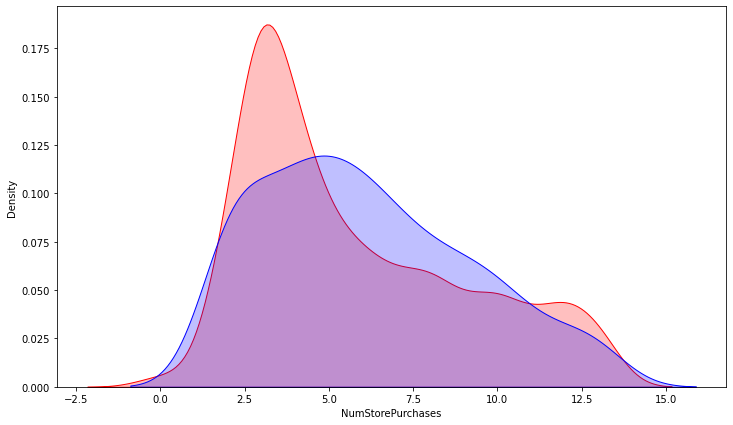

In [112]:
kde_plot('NumStorePurchases')

Between ~1.25 and ~5.1 store purchases, the '0' group has the higher density of customers. From 5.1 to ~11.13 store purchases, there is a higher density of group '1' customers. A possible hypothesis is some '1' group customers utilise their offers in-store.

## Box Plots

We are going to define a function that plots a categorical feature against a continuous feature. The function will also create the plot with a 'Response' hue. The goal is to display the spread and skewness of categories against continuous features in the dataset.

In [113]:
def box_plot(a,b,df):
    plt.figure(figsize=(15,10))
    sns.boxplot(x=a,y=b,data=df,hue='Response')

### Income & Education

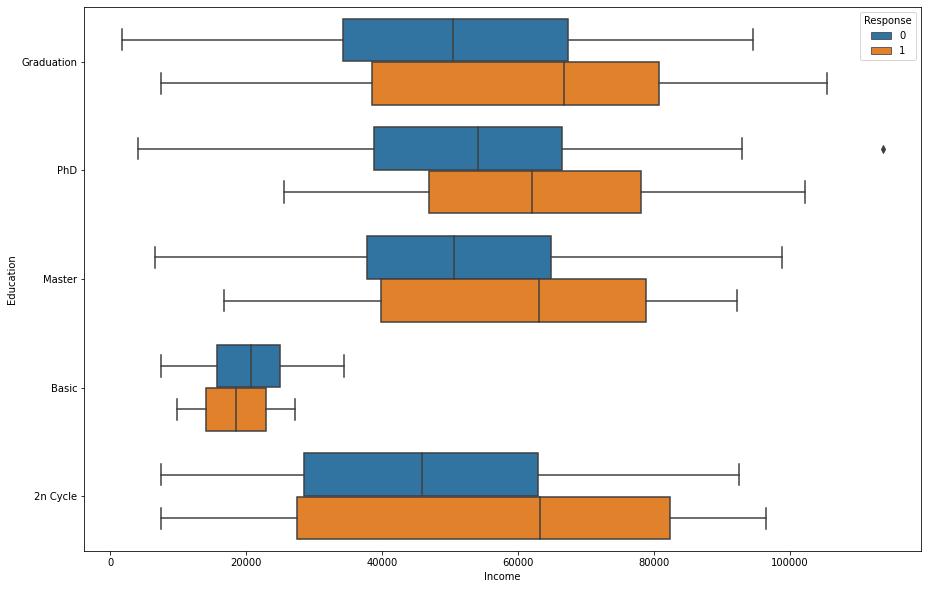

In [114]:
box_plot('Income','Education',df[df['Income']<=120000])

Notice that the '1' group earns higher on average than the 'O' group across every Education category except 'Basic'. Also notice the limited earning power of customers with a basic education. Surprisingly, a lot of 'Basic' customers on the left whisker earn higher than some customers with advanced/higher education. However, income for the group seems limited and capped at ~37k to 38k.

Let's see if this dynamic could affect any pricing decisions from the business. We can figure this out by determining if they are a key demographic in the customer base.

In [115]:
basic_customers = len(df[df['Education']=='Basic'])
total_customers = len(df)

basic_perc = 100 * (basic_customers / total_customers)
basic_perc = round(basic_perc,2)

print('Number of Basic customers: {}'.format(basic_customers))
print('Total number of customers: {}'.format(total_customers))
print('\n')
print('Percentage of Basic customers: {}%'.format(basic_perc))

Number of Basic customers: 54
Total number of customers: 2240


Percentage of Basic customers: 2.41%


At 2.41%, they are a negligible niche for the business and present to pressure to reduce prices based on their purchasing power/income.

### Income & Marital_Status

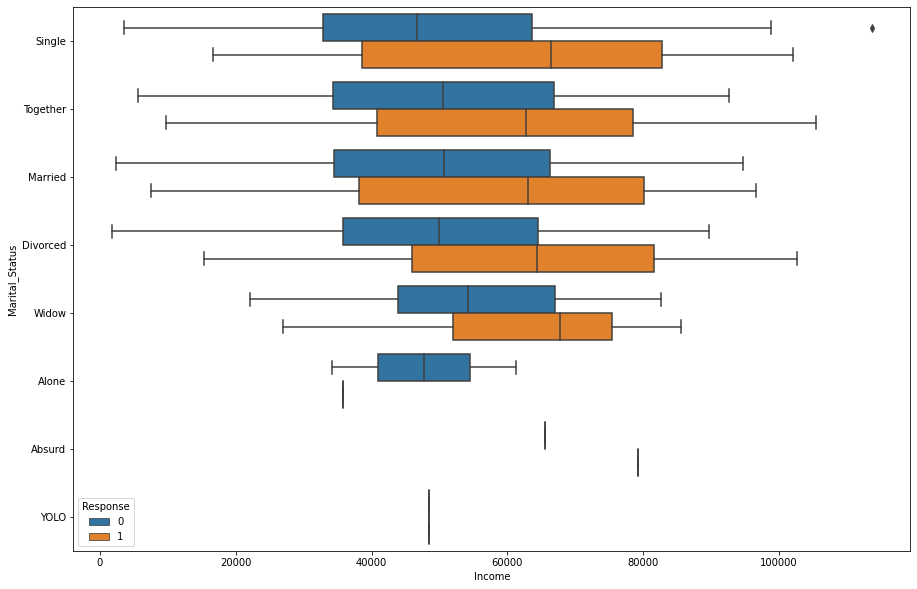

In [116]:
box_plot('Income','Marital_Status',df[df['Income']<=120000])

The '1' group seems to significantly outearn the '0' group across every marital category. Customers in the Widowed cluster seem to outearn other groups on the left whisker the plot but this trend isn't replicated on the right whisker where other groups outearn them. While the minimum pay for the group is impressive, the maximum pay pales in comparison to other categories.

### Mnt_Total & Marital_Status

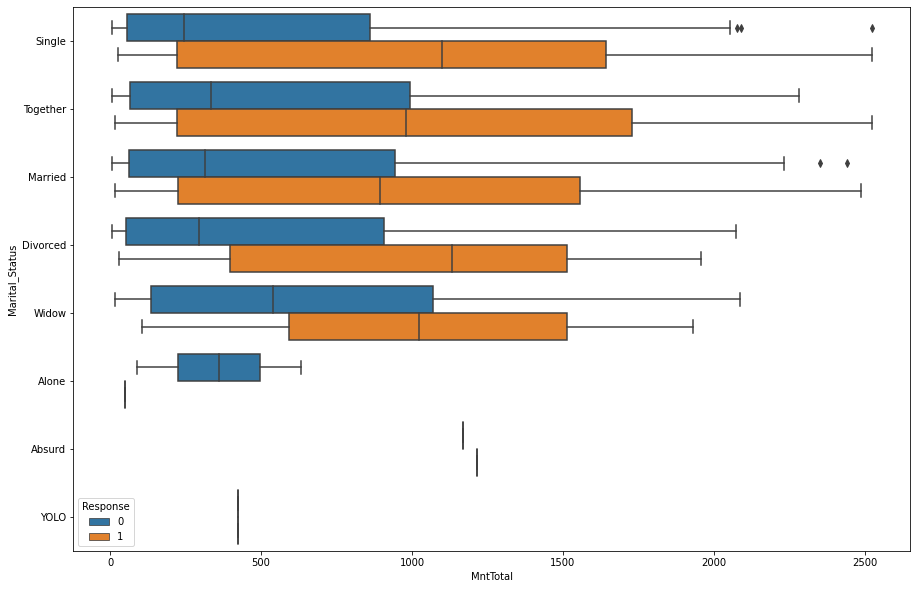

In [117]:
box_plot('MntTotal','Marital_Status',df)

The '1' group outspends the '0' group across every marital category. This trend definitely lends credence to the hypothesis that offers incentivise more customer spending. Let's explore the difference in spending amounts between both label groups to get more detail.

In [118]:
prod_spend_0 = df[df['Response']==0]['MntTotal'].mean()
prod_spend_1 = df[df['Response']==1]['MntTotal'].mean()

prod_spend_0 = round(prod_spend_0)
prod_spend_1 = round(prod_spend_1)

print('Avergae Product Spend (0): USD{}'.format(prod_spend_0))
print('Average Product Spend (1): USD{}'.format(prod_spend_1))
print('\n')
print('Difference: USD{}'.format(prod_spend_1 - prod_spend_0))

Avergae Product Spend (0): USD539
Average Product Spend (1): USD987


Difference: USD448


Customers who accept offers end up spending USD448 more on average than customers who reject offers.

# Learning

## Feature Scaling

Before our data is fed into the model and will require a **gradient descent** to find a minimum, we'll scale the features just to ensure that features with much larger values/ranges do not affect the model's performance. Scaling will bring all the values in the dataset between 0 and 1.

We need to identify isolate the numeric columns from the 'df' dataset and assign them to a new dataset.

In [119]:
df_model = df[['Customer_Age','Edu','Marital','Income','Kidhome','Teenhome','Customer_Period','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Response']]

In [120]:
from sklearn.preprocessing import MinMaxScaler

In [121]:
scaler = MinMaxScaler()

In [122]:
df_scaled = scaler.fit_transform(df_model)

Let's convert the scaled matrix back to a database.

In [123]:
scaled_columns = ['Customer_Age','Edu','Marital','Income','Kidhome','Teenhome','Customer_Period','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Response']

In [124]:
df_scaled = pd.DataFrame(df_scaled, columns = scaled_columns)

To check and confirm our scaling operation:

In [125]:
df_scaled.describe().round(2)

,Customer_Age,Edu,Marital,Income,Kidhome,Teenhome,Customer_Period,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
count,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,...,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,0.48,0.60,0.21,0.08,0.22,0.25,0.49,0.50,0.20,0.13,...,0.10,0.45,0.27,0.06,0.01,0.07,0.07,0.07,0.01,0.15
std,0.21,0.28,0.15,0.04,0.27,0.27,0.34,0.29,0.23,0.20,...,0.10,0.25,0.12,0.25,0.11,0.26,0.26,0.26,0.10,0.36
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.34,0.50,0.14,0.05,0.00,0.00,0.50,0.24,0.02,0.01,...,0.00,0.23,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.46,0.50,0.29,0.07,0.00,0.00,0.50,0.49,0.12,0.04,...,0.07,0.38,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.66,0.75,0.29,0.10,0.50,0.50,0.50,0.75,0.34,0.17,...,0.14,0.62,0.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Train-Test Split

In [126]:
from sklearn.model_selection import train_test_split

Isolate the independent features from the labels.

In [127]:
X = df_scaled.drop('Response',axis=1)

In [128]:
y = df_scaled['Response']

Run the split.

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Logistic Regression

Our first approach will be adopting the Logistic Regression algorithm. We already know in advance that our model and predictions will be inefficient and largely unreliable considering the label imbalance. This issue will be evidenced by our recall and f-1 scores. The model has only been run for illustration purposes.

In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
logmodel = LogisticRegression()

In [132]:
logmodel.fit(X_train,y_train)

LogisticRegression()

Make predictions.

In [133]:
predictions = logmodel.predict(X_test)

Evaluate the model.

In [134]:
from sklearn.metrics import classification_report

In [135]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       553
         1.0       0.81      0.37      0.51       119

    accuracy                           0.87       672
   macro avg       0.85      0.68      0.72       672
weighted avg       0.87      0.87      0.85       672



Just like we anticipated, our recall (0.42) and f-1 (0.51) scores are not impressive for the '1' label. At this point in our analysis, our prediction 'problem' remains unsolved.

## Synthetic Minority Oversampling (SMOTE)

Our SMOTE approach will synthesize new data points/rows from df_scaled's '1' class (instead of a vanilla duplication of samples) enough to even up the difference in label observations between the '0' and '1' class.

In [136]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

In [137]:
X_sm, y_sm = smote.fit_resample(X,y)

Let's confirm the resampling operation graphically:

<AxesSubplot:>

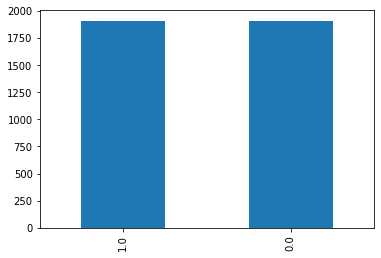

In [138]:
y_sm.value_counts().plot(kind='bar')

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.33, stratify=y_sm)

Let's confirm the stratify action on the training and test labels graphically:

<AxesSubplot:>

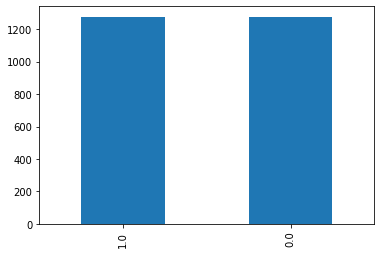

In [140]:
y_train.value_counts().plot(kind='bar')

<AxesSubplot:>

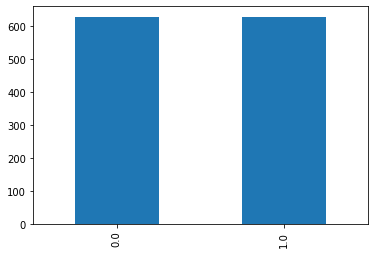

In [141]:
y_test.value_counts().plot(kind='bar')

Fit the model.

In [142]:
logmodel.fit(X_train,y_train)

LogisticRegression()

Make predictions.

In [143]:
predictions = logmodel.predict(X_test)

Evaluate the model.

In [144]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       629
         1.0       0.81      0.80      0.81       629

    accuracy                           0.81      1258
   macro avg       0.81      0.81      0.81      1258
weighted avg       0.81      0.81      0.81      1258



We can notice a vast improvement in our recall and f-1 scores for the '1' class. Notice how both labels also have an equal number of data points via synthetic oversampling.

Before we decide on this model, however, let's try downsampling the '1' class with the ENSEMBLE technique and comparing our results.

## Ensemble Downsampling

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

Just to remind ourselves of the imbalance in our label counts:

In [146]:
y_train.value_counts()

0.0    1334
1.0     234
Name: Response, dtype: int64

We have a ~(1:6) ratio of our '1' class to our '0' class. This means we will have to downsample our '0' class into 6 different batches.

We will divide our dataframe into 2 separate dataframes per label. We will then divide our '0' dataframe into six different batches where each batch will have the same number of '0' classes as the '1' class in our '1' dataframe.

Let's concatenate 'X_train' with 'y_train' to get a training dataframe for our downsampling exercise.

In [147]:
df2 = X_train.copy()
df2['Response'] = y_train

Let's create two datatframes for our labels from the training dataframe.

In [148]:
df2_0 = df2[df2['Response']==0]
df2_1 = df2[df2['Response']==1]

In [149]:
len(df2_1)

234

Our batching technique will split the '1' dataframe in numerical order. i.e. Batch 1 will be gotten from the first 234 rows, Batch 2 from the following 234, till we complete 6 batches.

The batching operation will be executed by a function that will be called six times. Fitting, prediction and model evaluation (recall and f-1 score) will be executed right after each function call. 

Per ensemble convention, a vote will then be taken on predicted labels and the labels with the highest votes will be evaluated against y_test to produce final recall and f-1 scores.

In [150]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train = pd.concat([df_majority[start:end],df_minority],axis=0)
    
    X_train = df_train.drop('Response',axis='columns')
    y_train = df_train['Response']
    
    return X_train,y_train

We can now train and predict on the different '0' batches.

### PREDICTION 1

In [151]:
X_train,y_train = get_train_batch(df2_0,df2_1,0,234)
logmodel.fit(X_train,y_train)
pred_1 = logmodel.predict(X_test)
print(classification_report(y_test,pred_1))

              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89       572
         1.0       0.44      0.77      0.56       100

    accuracy                           0.82       672
   macro avg       0.70      0.80      0.72       672
weighted avg       0.88      0.82      0.84       672



### PREDICTION 2

In [152]:
X_train,y_train = get_train_batch(df2_0,df2_1,234,468)
logmodel.fit(X_train,y_train)
pred_2 = logmodel.predict(X_test)
print(classification_report(y_test,pred_2))

              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89       572
         1.0       0.43      0.70      0.53       100

    accuracy                           0.82       672
   macro avg       0.68      0.77      0.71       672
weighted avg       0.86      0.82      0.83       672



### PREDICTION 3

In [153]:
X_train,y_train = get_train_batch(df2_0,df2_1,468,702)
logmodel.fit(X_train,y_train)
pred_3 = logmodel.predict(X_test)
print(classification_report(y_test,pred_3))

              precision    recall  f1-score   support

         0.0       0.95      0.83      0.88       572
         1.0       0.43      0.74      0.54       100

    accuracy                           0.81       672
   macro avg       0.69      0.78      0.71       672
weighted avg       0.87      0.81      0.83       672



### PREDICTION 4

In [154]:
X_train,y_train = get_train_batch(df2_0,df2_1,702,936)
logmodel.fit(X_train,y_train)
pred_4 = logmodel.predict(X_test)
print(classification_report(y_test,pred_4))

              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87       572
         1.0       0.40      0.73      0.52       100

    accuracy                           0.80       672
   macro avg       0.67      0.77      0.69       672
weighted avg       0.86      0.80      0.82       672



### PREDICTION 5

In [155]:
X_train,y_train = get_train_batch(df2_0,df2_1,936,1170)
logmodel.fit(X_train,y_train)
pred_5 = logmodel.predict(X_test)
print(classification_report(y_test,pred_5))

              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88       572
         1.0       0.43      0.77      0.55       100

    accuracy                           0.81       672
   macro avg       0.69      0.79      0.72       672
weighted avg       0.88      0.81      0.83       672



### PREDICTION 6

In [156]:
X_train,y_train = get_train_batch(df2_0,df2_1,1170,1334)
logmodel.fit(X_train,y_train)
pred_6 = logmodel.predict(X_test)
print(classification_report(y_test,pred_6))

              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84       572
         1.0       0.36      0.85      0.51       100

    accuracy                           0.76       672
   macro avg       0.66      0.79      0.67       672
weighted avg       0.88      0.76      0.79       672



Let's take the vote.

In [157]:
pred_final = pred_1.copy()

for i in range(len(pred_1)):
    n_ones = pred_1[i] + pred_2[i] + pred_3[i] + pred_4[i] + pred_5[i] + pred_6[i]
    if n_ones > 3:
        pred_final[i] = 1
    else:
        pred_final[i] = 0

In [158]:
print(classification_report(y_test, pred_final))

              precision    recall  f1-score   support

         0.0       0.95      0.83      0.88       572
         1.0       0.43      0.75      0.55       100

    accuracy                           0.81       672
   macro avg       0.69      0.79      0.71       672
weighted avg       0.87      0.81      0.83       672



# CONCLUSION

We improved our results vastly with our SMOTE and Ensemble Downsampling approaches. However, it turns out our Ensemble scores aren't any better than our SMOTE scores. It would appear our SMOTE approach has vastly outperformed our downsampling approach.

We can therefore conclude that our SMOTE model can presented to and adopted for offer prediction problem-solving by our 'client'.